# 드라이브 마운트 / 모듈 임포트 / 한글 폰트 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import matplotlib.colors as mcolors
import pandas as pd
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
import ast

In [ ]:
# 나눔바른고딕 글꼴 파일 경로 지정
current_directory = "/content/drive/MyDrive/Colab Notebooks"
font_path = os.path.join(current_directory, "NanumBarunGothic.ttf")

#글꼴이 있는지 확인
if os.path.exists(font_path):
    #폰트 추가
    fm.fontManager.addfont(font_path)

    # 캐시를 새로 고치지 않고 직접 폰트 설정
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 출력 설정

# 1. Data Load

## 데이터프레임 생성 및 확인

In [ ]:
# 인터파크 데이터셋 = inter_df
interpark_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KOREA IT/m3_분석라이브러리/crawling/Interpark_books_dataset.csv')

print(interpark_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23899 entries, 0 to 23898
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Publisher  23899 non-null  object
 1   Category   23899 non-null  object
 2   Title      23899 non-null  object
 3   Sales      23899 non-null  object
 4   Year       23899 non-null  int64 
 5   Month      23899 non-null  int64 
 6   Age        23899 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.3+ MB
None


In [ ]:
# 예스24 데이터셋 = yes_df
yes24_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KOREA IT/m3_분석라이브러리/crawling/yes24_bestseller_data_final.csv')
yes24_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13620 entries, 0 to 13619
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          13620 non-null  int64  
 1   Month         13620 non-null  int64  
 2   Category      13620 non-null  object 
 3   Title         13620 non-null  object 
 4   Author        13620 non-null  object 
 5   Publisher     13620 non-null  object 
 6   Price         13620 non-null  int64  
 7   Publish_Date  13620 non-null  object 
 8   Sales_Index   13620 non-null  int64  
 9   Rating        13620 non-null  float64
 10  Age_Scores    13620 non-null  object 
 11  Pages         13572 non-null  object 
 12  Keywords      13620 non-null  object 
 13  Gender        13620 non-null  int64  
 14  Age           13620 non-null  int64  
 15  month         13620 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 1.7+ MB


In [ ]:
interpark_df.head()

,Publisher,Category,Title,Sales,Year,Month,Age
0,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 영어영역 영어 (2017),552 권,2017,1,1
1,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 국어영역 문학 (2017),524 권,2017,1,1
2,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 수학영역 확률과 통계 (2017),490 권,2017,1,1
3,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 국어영역 독서 (2017),476 권,2017,1,1
4,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 영어영역 영어독해연습 (2017),468 권,2017,1,1


In [ ]:
yes24_df.head()

,Year,Month,Category,Title,Author,Publisher,Price,Publish_Date,Sales_Index,Rating,Age_Scores,Pages,Keywords,Gender,Age,month
0,2024,1,가정과 살림,나는 다정한 관찰자가 되기로 했다,이은경 저,서교책방,16020,2024년 05월,237453,9.7,"{'10대': 0.0, '20대': 10.0, '30대': 9.0, '40대': 9...",288,"['#엄마가된다는것', '#엄마는처음이라', '#초보엄마', '#자녀교육']",1,10,6
1,2024,1,가정과 살림,성심당 케이크 레시피,안종섭 저,비앤씨월드,18000,2024년 05월,3060,9.1,{},228,"['#레시피', '#맛집레시피', '#디저트레시피북', '#베이킹', '#홈베이킹']",1,10,6
2,2024,1,가정과 살림,조이 오브 쿠킹,"이르마 S. 롬바우어, 존 베커, 메건 스콧 저/구계원 역",세미콜론,69300,2024년 02월,2076,9.8,{},"1,280","['#도시락레시피', '#반찬고민', '#간편요리', '#자취요리', '#집반찬']",1,10,6
3,2024,1,가정과 살림,10분 완성 초간단 도시락 레시피 100,오민주 저,시원북스,16020,2024년 02월,7914,9.9,"{'10대': 0.0, '20대': 0.0, '30대': 10.0, '40대': 9...",260,"['#크레마클럽에있어요', '#새해결심', '#집밥레시피', '#자취요리', '#싸...",1,10,6
4,2024,1,가정과 살림,뿐이 토핑 이유식,정주희 저/이수진 감수,서사원,26820,2024년 03월,89208,9.8,"{'10대': 0.0, '20대': 0.0, '30대': 9.0, '40대': 10...",640,"['#국민육아템', '#초보엄마', '#간편이유식']",1,20,6


## 데이터 전처리

### 인터파크 데이터셋

- 독서 트렌드 파악에 유용하게 활용될 수 없는 컬럼 삭제  
( 학습서, 사전, 잡지 등 시간이 바뀜에 따라 구매층이 바뀔 것 같지 않은 카테고리들 삭제 )
- 데이터가 적은 비슷한 유형의 카테고리끼리 결합
- ['Year', 'Month'] 컬럼을 묶어 ['Date'] 컬럼 생성 (dtype=datetime)
- 판매부수를 나타내는 ['Sales'] 컬럼의 데이터타입을 연산에 유리한 int 형으로 형변환
- ['Age'] 컬럼의 데이터를 (1, 2, 3 ..) 형태에서 ('10대', '20대', '30대' ..) 형태로 변환

In [ ]:
# before

print(interpark_df.Category.value_counts())

Category
초중고생학습서      6009
소설           2941
경제경영         2554
시/에세이        2260
인문           2135
자기계발         1795
국어/외국어/사전    1051
자격서/수험서       878
아동            822
가정과 생활        563
사회과학          532
역사            369
만화/라이트노벨      362
건강/미용         334
잡지            249
자연과 과학        233
예술/대중문화       135
청소년           133
종교/역학         133
유아            118
전공도서/대학교재      91
외국도서           67
컴퓨터/인터넷        58
일본도서           36
취미/레저          26
여행             14
유아동전집           1
Name: count, dtype: int64


In [ ]:
# after

filtered_interpark_df = interpark_df[~interpark_df['Category'].isin(['초중고생학습서', '국어/외국어/사전', '자격서/수험서', '전공도서/대학교재', '잡지'])]

# 필터링된 데이터셋 확인
print(filtered_interpark_df['Category'].value_counts())

Category
소설          2941
경제경영        2554
시/에세이       2260
인문          2135
자기계발        1795
아동           822
가정과 생활       563
사회과학         532
역사           369
만화/라이트노벨     362
건강/미용        334
자연과 과학       233
예술/대중문화      135
청소년          133
종교/역학        133
유아           118
외국도서          67
컴퓨터/인터넷       58
일본도서          36
취미/레저         26
여행            14
유아동전집          1
Name: count, dtype: int64


In [ ]:
def transform_category(category):
    if category in ['여행', '취미/레저', '예술/대중문화']:
        return '예술/대중문화/취미'
    elif category in ['유아동전집', '유아', '아동']:
        return '유아동'
    elif category == '일본도서':
        return '외국도서'
    elif category in ['역사', '사회과학']:
        return '사회과학 / 역사'
    elif category == '건강/미용':
        return '가정과 생활'
    else:
        return category


filtered_interpark_df['Category'] = filtered_interpark_df['Category'].apply(transform_category)

# 날짜 칼럼 생성
interpark_df['Date'] = pd.to_datetime(interpark_df[['Year', 'Month']].assign(DAY=1))
filtered_interpark_df['Date'] = pd.to_datetime(interpark_df[['Year', 'Month']].assign(DAY=1))

# Sales 칼럼 Type 정수형 변환
interpark_df['Sales'] = interpark_df['Sales'].str.extract('(\d+)').astype(int)
filtered_interpark_df['Sales'] = filtered_interpark_df['Sales'].str.extract('(\d+)').astype(int)

# 연령대 변환
age_mapping = {1: '10대', 2: '20대', 3: '30대', 4: '40대', 5: '50대', 6: '60대'}
interpark_df['Age'] = interpark_df['Age'].replace(age_mapping)
filtered_interpark_df['Age'] = filtered_interpark_df['Age'].replace(age_mapping)


# 결과 확인
print(filtered_interpark_df.head())

       Publisher  Category                                Title  Sales  Year  \
10         대원씨아이        소설                              너의 이름은.    270  2017   
12         대원씨아이  만화/라이트노벨  너의 이름은. - Another Side : Earthbound    198  2017   
19  대원씨아이(만화/잡지)  만화/라이트노벨                             너의 이름은 1    123  2017   
21            예담     시/에세이              어쩌면 별들이 너의 슬픔을 가져갈지도 몰라    118  2017   
27  대원씨아이(만화/잡지)  만화/라이트노벨                             너의 이름은 2     90  2017   

    Month  Age       Date  
10      1  10대 2017-01-01  
12      1  10대 2017-01-01  
19      1  10대 2017-01-01  
21      1  10대 2017-01-01  
27      1  10대 2017-01-01  


<ipython-input-10-3012f51bcc88>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_interpark_df['Category'] = filtered_interpark_df['Category'].apply(transform_category)
<ipython-input-10-3012f51bcc88>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_interpark_df['Date'] = pd.to_datetime(interpark_df[['Year', 'Month']].assign(DAY=1))
<ipython-input-10-3012f51bcc88>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

### 예스 24 데이터셋

- 책의 쪽수가 담겨있는 'Pages' 컬럼의 결측치 확인 후 평균값으로 대체
- 출판일자가 담겨있는 'Publish_Date' 컬럼에서 월을 추출해 'Publish_Month' 컬럼 생성
- 'Pages', 'Price' 를 범주화하여 'Page_cat', 'Price_cat' 컬럼 생성

In [ ]:
# 결측치 확인 및 dtype 확인
print(yes24_df.isna().sum())
print(yes24_df.dtypes)

Year             0
Month            0
Category         0
Title            0
Author           0
Publisher        0
Price            0
Publish_Date     0
Sales_Index      0
Rating           0
Age_Scores       0
Pages           48
Keywords         0
Gender           0
Age              0
month            0
dtype: int64
Year              int64
Month             int64
Category         object
Title            object
Author           object
Publisher        object
Price             int64
Publish_Date     object
Sales_Index       int64
Rating          float64
Age_Scores       object
Pages            object
Keywords         object
Gender            int64
Age               int64
month             int64
dtype: object


In [ ]:
yes24_df[yes24_df['Pages'].isna()].head()

,Year,Month,Category,Title,Author,Publisher,Price,Publish_Date,Sales_Index,Rating,Age_Scores,Pages,Keywords,Gender,Age,month
3327,2024,1,역사,나의 문화유산답사기 소장본 세트,유홍준 저,창비,131400,2023년 04월,4452,10.0,{},NaN,"['#인문위클리레터에소개된책', '#ㅁㅁ로본세계사', '#이책이나를출판사도살렸다',...",1,30,6
3507,2024,2,역사,나의 문화유산답사기 소장본 세트,유홍준 저,창비,131400,2023년 04월,4452,10.0,{},NaN,"['#인문위클리레터에소개된책', '#ㅁㅁ로본세계사', '#이책이나를출판사도살렸다',...",1,30,6
3687,2024,3,역사,나의 문화유산답사기 소장본 세트,유홍준 저,창비,131400,2023년 04월,4452,10.0,{},NaN,"['#인문위클리레터에소개된책', '#ㅁㅁ로본세계사', '#이책이나를출판사도살렸다',...",1,30,6
3867,2024,4,역사,나의 문화유산답사기 소장본 세트,유홍준 저,창비,131400,2023년 04월,4452,10.0,{},NaN,"['#인문위클리레터에소개된책', '#ㅁㅁ로본세계사', '#이책이나를출판사도살렸다',...",1,30,6
4047,2024,5,역사,나의 문화유산답사기 소장본 세트,유홍준 저,창비,131400,2023년 04월,4452,10.0,{},NaN,"['#인문위클리레터에소개된책', '#ㅁㅁ로본세계사', '#이책이나를출판사도살렸다',...",1,30,6


In [ ]:
# Pages 컬럼    dtype    Object -> int  로 형변환 해주고 평균값으로 대체
yes24_df['Pages'] = pd.to_numeric(yes24_df['Pages'], errors='coerce').astype('Int64')
yes24_df['Pages'] = yes24_df['Pages'].fillna(yes24_df['Pages'].mean().round())

# 결과 확인
print('isna().sum().sum() :', yes24_df.isna().sum().sum())
print('Pages 컬럼 데이터타입 : ', yes24_df['Pages'].dtype)

isna().sum().sum() : 0
Pages 컬럼 데이터타입 :  Int64


In [ ]:
# Publish_Month , Page_cat, Price_cat 컬럼 생성
yes24_df['Publish_Month'] = yes24_df['Publish_Date'].str.extract(r'(\d{2})월')[0].astype(int)

# page 범주화
bins = [0, 200, 250, 300, 350, 400, float('inf')]
labels = ['0-200', '200-250', '250-300', '300-350', '350-400','400+']
yes24_df['Page_cat'] = pd.cut(yes24_df['Pages'], bins=bins, labels=labels)

# 가격 범주화
bins = [0, 10000, 15000, 17500, 20000, 25000, float('inf')]
labels = ['0-10,000', '10,000-15,000', '15,000-17,500', '17,500-20,000', '20,000-25,000', '25,000+']
yes24_df['Price_cat'] = pd.cut(yes24_df['Price'], bins=bins, labels=labels)

# 결과 확인
yes24_df.head()

,Year,Month,Category,Title,Author,Publisher,Price,Publish_Date,Sales_Index,Rating,Age_Scores,Pages,Keywords,Gender,Age,month,Publish_Month,Page_cat,Price_cat
0,2024,1,가정과 살림,나는 다정한 관찰자가 되기로 했다,이은경 저,서교책방,16020,2024년 05월,237453,9.7,"{'10대': 0.0, '20대': 10.0, '30대': 9.0, '40대': 9...",288,"['#엄마가된다는것', '#엄마는처음이라', '#초보엄마', '#자녀교육']",1,10,6,5,250-300,"15,000-17,500"
1,2024,1,가정과 살림,성심당 케이크 레시피,안종섭 저,비앤씨월드,18000,2024년 05월,3060,9.1,{},228,"['#레시피', '#맛집레시피', '#디저트레시피북', '#베이킹', '#홈베이킹']",1,10,6,5,200-250,"17,500-20,000"
2,2024,1,가정과 살림,조이 오브 쿠킹,"이르마 S. 롬바우어, 존 베커, 메건 스콧 저/구계원 역",세미콜론,69300,2024년 02월,2076,9.8,{},317,"['#도시락레시피', '#반찬고민', '#간편요리', '#자취요리', '#집반찬']",1,10,6,2,300-350,"25,000+"
3,2024,1,가정과 살림,10분 완성 초간단 도시락 레시피 100,오민주 저,시원북스,16020,2024년 02월,7914,9.9,"{'10대': 0.0, '20대': 0.0, '30대': 10.0, '40대': 9...",260,"['#크레마클럽에있어요', '#새해결심', '#집밥레시피', '#자취요리', '#싸...",1,10,6,2,250-300,"15,000-17,500"
4,2024,1,가정과 살림,뿐이 토핑 이유식,정주희 저/이수진 감수,서사원,26820,2024년 03월,89208,9.8,"{'10대': 0.0, '20대': 0.0, '30대': 9.0, '40대': 10...",640,"['#국민육아템', '#초보엄마', '#간편이유식']",1,20,6,3,400+,"25,000+"


# 2. Dataset Describe


### Data Scale

<br>

- **Interpark**: 15,261 data points (data range: 17.01 ~ 24.5)
  - 도서 구매 사이트 시장 점유율 약 10% (4위)
  - 시장 점유율이 낮은 만큼 데이터 분석에 전적으로 활용하고 신뢰하기엔 무리가 있다.
  - 하지만, **광범위한 기간**의 데이터와 직접적인 책의 월별 **판매부수**를 공유하고 있기 때문에 *기간에 따른 독서량의 변화*, *기간에 따른 독자들의 선호도 변화* 등 **전체적인 분석**에 주로 활용된다.

<br>

- **Yes24**: 13,620 data points (data range: 24.1 ~ 24.6)
  - 도서 구매 사이트 시장 점유율 약 42% (1위)
  - 온라인 서점 사이트 중에서 1위를 하고 있기 때문에 상당히 신뢰할 수 있는 데이터라고 볼 수 있다.
  - 하지만, 1년 전까지의 데이터만을 공유하고 있으며, 책의 판매부수는 공개하지 않고 판매 지수만을 공개하는데 이 마저도 계산 방식이 각 서점마다 가중하는 점수가 매우 주관적이어서 사실상 정확한 판매 권수는 파악 불가능하다.
  - 따라서, 이미 변화된 사람들의 선호도에 대해 24년도 데이터를 활용해 *연령대나 성별은 어떻게 분포되어 있는지*, *인기 있는 책들의 구성(pages, price, etc.)은 어떤지* 등에 대한 **세부적인 지표**를 찾는 데에 주로 활용된다.


아래 시각화부분부터는 편의성을 위해 다음과 같이 사용
```
df = filtered_interpark_df.copy()
df2 = yes24_df.copy()
```


In [ ]:
df = filtered_interpark_df.copy()
df2 = yes24_df.copy()

# 3. 시간의 흐름에 따른 독서량 추세 (꺾은 선 그래프 (2x1) subplot)

**★ 독서량이 확실히 떨어지고 있다는 것을 확인 가능**

- 학습서 전처리 전/후 subplot    ==>   10대, 30대 독서량 변화.
- 코로나 초창기 17~18 년도 독서량 급격히 증가.

#### 3-1 기간 경과에 따른 독서량 변화 (기준: 연도)

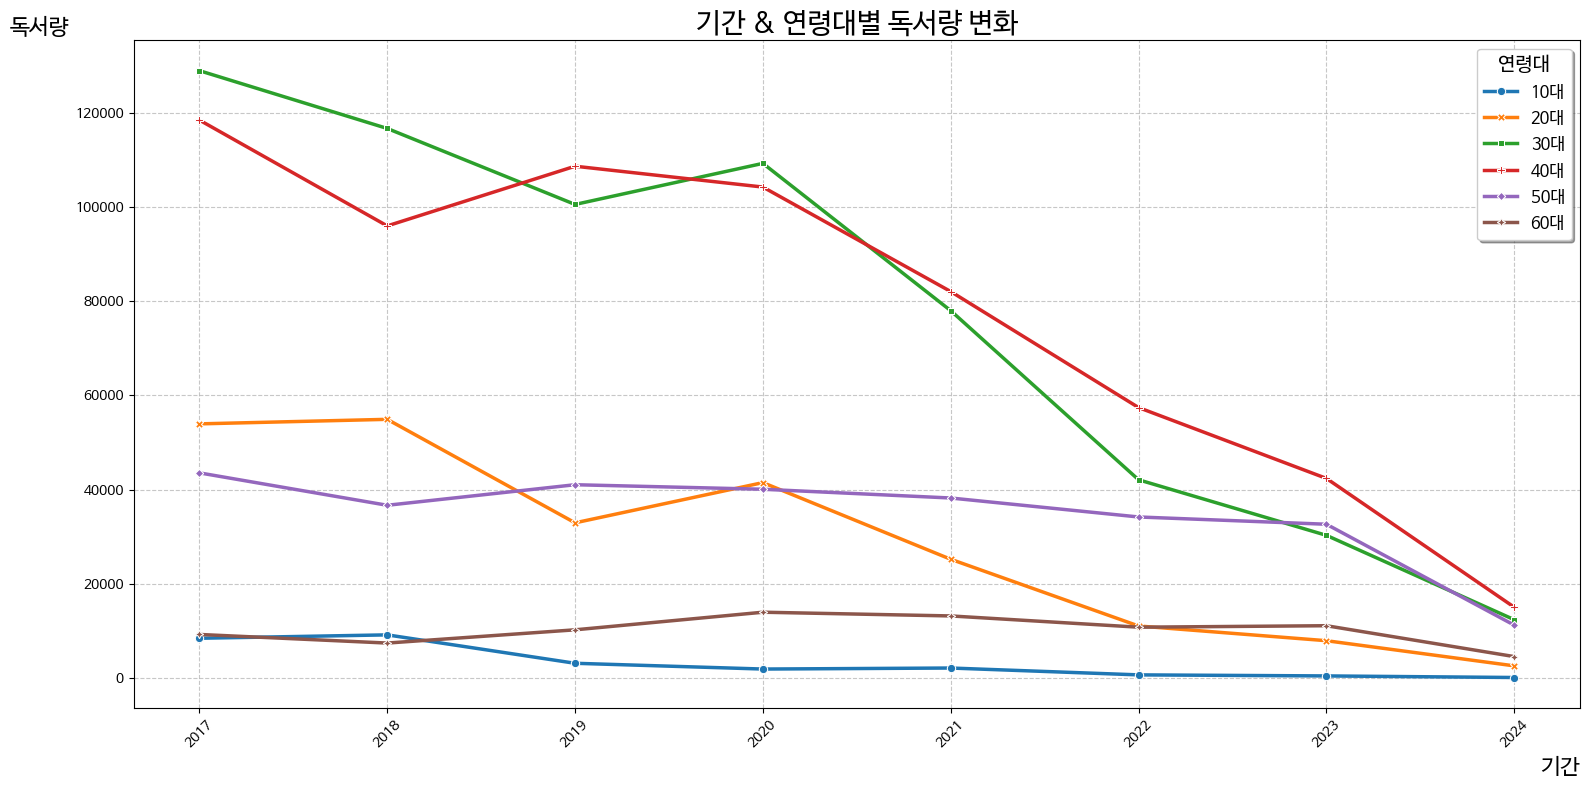

In [ ]:
date_sales_age = df.groupby(['Year', 'Age'])['Sales'].sum().reset_index()

# 기간별 독서량 변화
plt.figure(figsize=(16, 8))
sns.lineplot(data=date_sales_age, x='Year', y='Sales', hue='Age', style='Age', markers=True, palette='tab10',
             linewidth=2.5, dashes=False)

plt.title('기간 & 연령대별 독서량 변화', fontsize=20, weight='bold')
plt.xlabel('기간', fontsize=16, loc='right', weight='bold')
plt.ylabel('독서량', fontsize=16, rotation=0, loc='top', weight='bold')
plt.legend(title='연령대', title_fontsize=14, loc='upper right', fontsize=12, frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(date_sales_age['Year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

####3-2 연령대별 독서량 변화

In [ ]:
interpark_df.head()

,Publisher,Category,Title,Sales,Year,Month,Age,Date
0,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 영어영역 영어 (2017),552,2017,1,10대,2017-01-01
1,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 국어영역 문학 (2017),524,2017,1,10대,2017-01-01
2,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 수학영역 확률과 통계 (2017),490,2017,1,10대,2017-01-01
3,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 국어영역 독서 (2017),476,2017,1,10대,2017-01-01
4,한국교육방송공사(도서),초중고생학습서,EBS 수능특강 영어영역 영어독해연습 (2017),468,2017,1,10대,2017-01-01


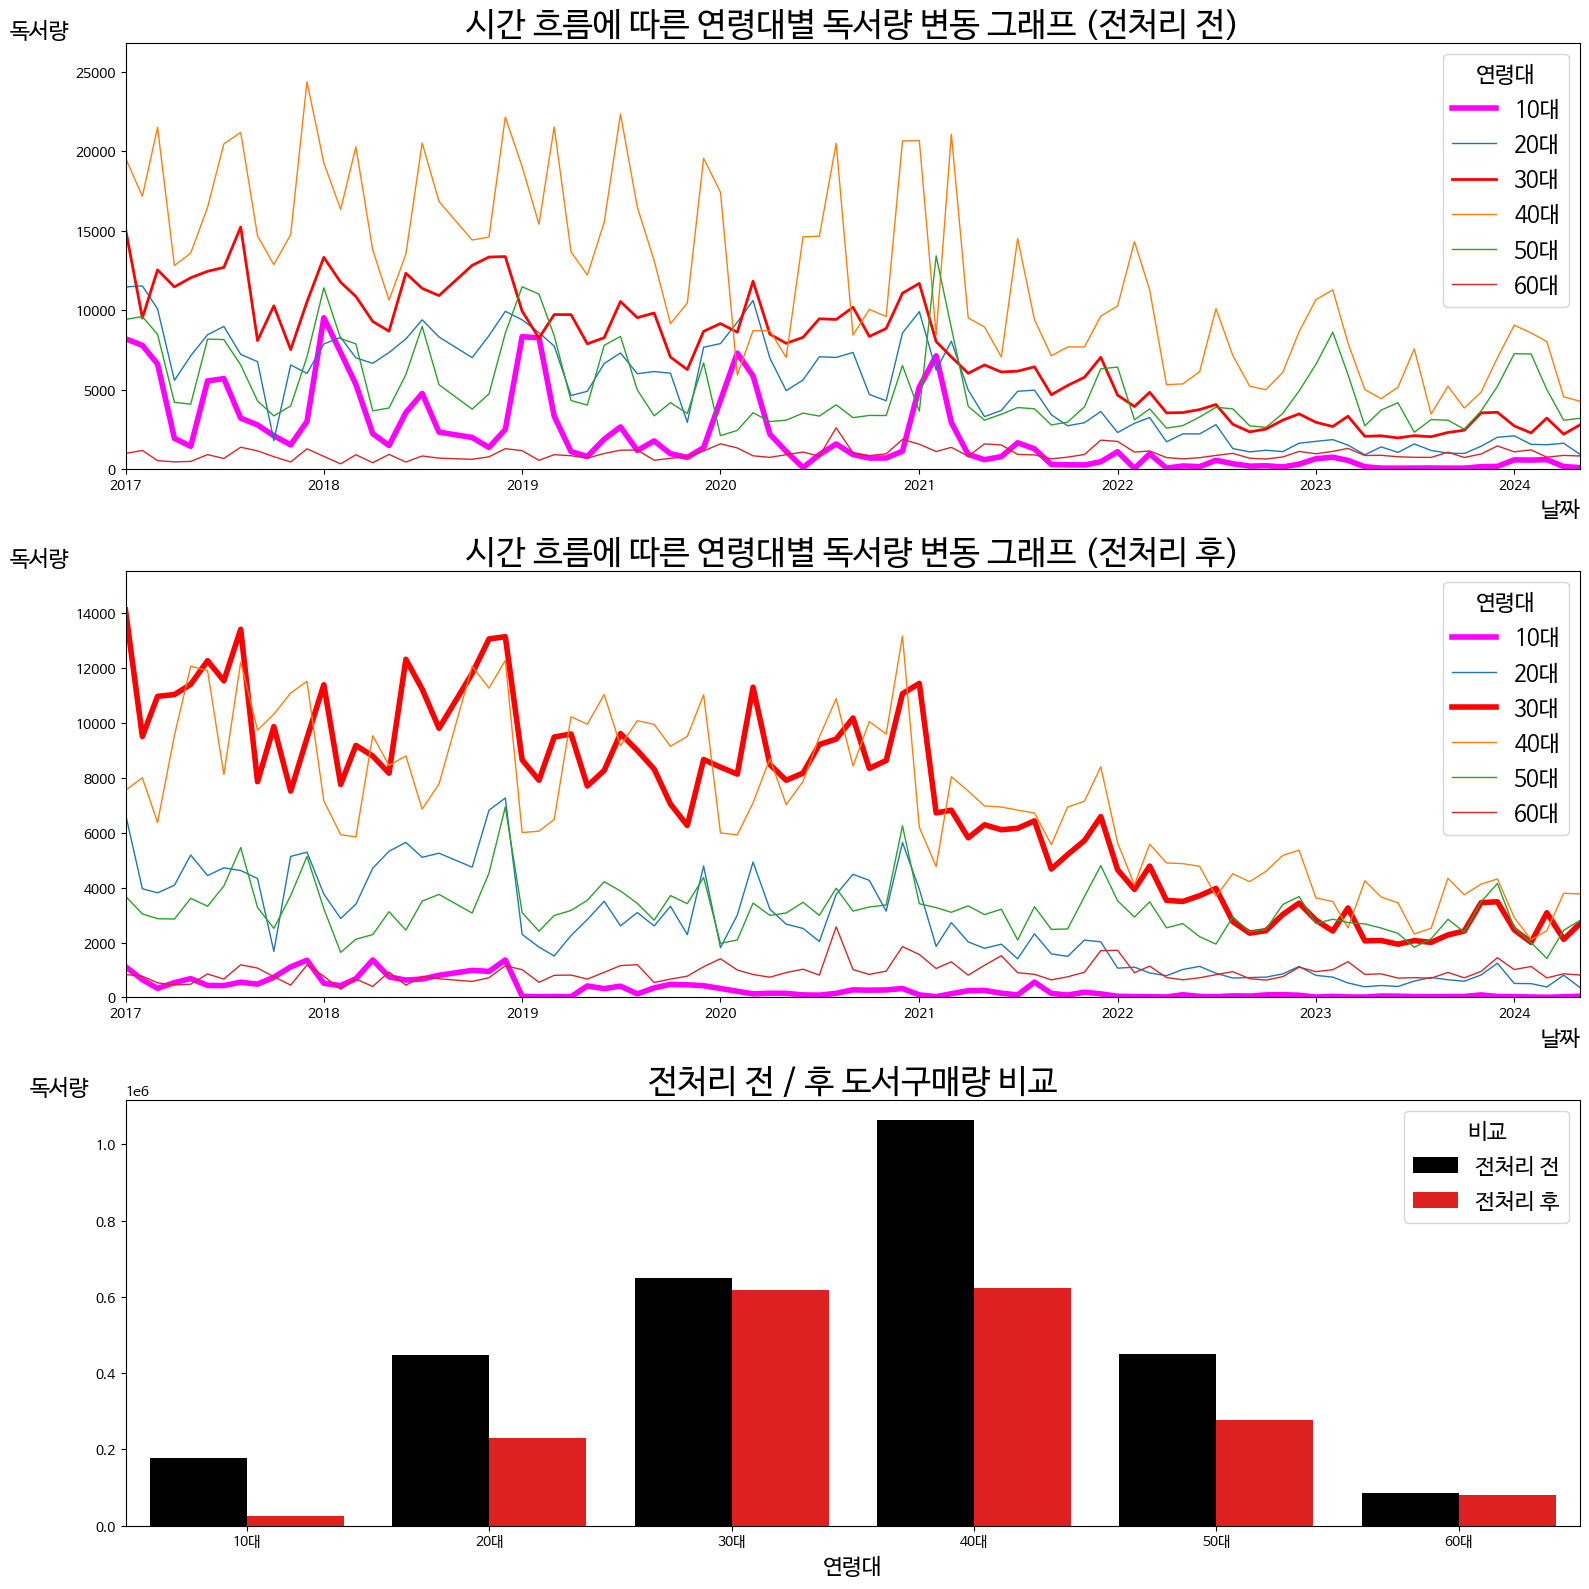

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연도별 책 판매량을 연령대별로 그룹화
dately_counts = interpark_df.groupby(['Date', 'Age'])['Sales'].sum().reset_index()
filtered_dately_counts = df.groupby(['Date', 'Age'])['Sales'].sum().reset_index()

# 전처리 전 데이터의 연령대별 총 도서구매량 계산
age_sales_before = dately_counts.groupby('Age')['Sales'].sum().reset_index()
age_sales_before['Status'] = '전처리 전'

# 전처리 후 데이터의 연령대별 총 도서구매량 계산
age_sales_after = filtered_dately_counts.groupby('Age')['Sales'].sum().reset_index()
age_sales_after['Status'] = '전처리 후'

# 전처리 전과 후 데이터를 하나의 DataFrame으로 결합
combined_sales = pd.concat([age_sales_before, age_sales_after])

# 라인 그래프 그리기
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))

# 첫 번째 그래프 (전처리 전 데이터)
for age, data in dately_counts.groupby('Age'):
    if age == '10대':
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax1, label=f'{age}', linewidth=4, color='magenta')
    elif age == '30대':
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax1, label=f'{age}', linewidth=2, color='red')
    else:
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax1, label=f'{age}', linewidth=1)

ax1.set_title('시간 흐름에 따른 연령대별 독서량 변동 그래프 (전처리 전)', fontdict={'fontsize': 24})
ax1.set_xlabel('날짜', fontsize=16, loc='right')
ax1.set_ylabel('독서량', fontsize=16, rotation=0, loc='top')
ax1.legend(title='연령대', title_fontsize=16, loc='upper right', fontsize=16)
ax1.set_xlim(dately_counts['Date'].min(), dately_counts['Date'].max())
ax1.set_ylim(0, dately_counts['Sales'].max() * 1.1)

# 두 번째 그래프 (전처리 후 데이터)
for age, data in filtered_dately_counts.groupby('Age'):
    if age == '10대':
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax2, label=f'{age}', linewidth=4, color='magenta')
    elif age == '30대':
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax2, label=f'{age}', linewidth=4, color='red')
    else:
        sns.lineplot(data=data, x='Date', y='Sales', ax=ax2, label=f'{age}', linewidth=1)

ax2.set_title('시간 흐름에 따른 연령대별 독서량 변동 그래프 (전처리 후)', fontdict={'fontsize': 24})
ax2.set_xlabel('날짜', fontsize=16, loc='right')
ax2.set_ylabel('독서량', fontsize=16, rotation=0, loc='top')
ax2.legend(title='연령대', title_fontsize=16, loc='upper right', fontsize=16)
ax2.set_xlim(filtered_dately_counts['Date'].min(), filtered_dately_counts['Date'].max())
ax2.set_ylim(0, filtered_dately_counts['Sales'].max() * 1.1)

# 세 번째 그래프 (전처리 전과 후 연령대별 도서구매량 비교)
custom_palette = ['black', 'red']
sns.barplot(data=combined_sales, x='Age', y='Sales', hue='Status', palette=custom_palette)

ax3.set_title('전처리 전 / 후 도서구매량 비교', fontsize=24)
ax3.set_xlabel('연령대', fontsize=16)
ax3.set_ylabel('독서량', fontsize=16, rotation=0, loc='top')
ax3.legend(title='비교', title_fontsize=16, fontsize=16)

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

### 연령대 독서량 변화 시각화 : 전처리 적용 전/후 비교 결과
#### 연령층 중 10대, 30대, 40대 유의미한 변화 확인 가능
 - 10대
  - 전처리 전 : 연초에 집중된 도서구매량 분포를 확인할 수 있습니다. 그로인해 학기가 시작하는 시기에 집중되있음을 예측할 수 있습니다.
  - 전처리 후 : 학습도서를 전처리한 결과 학기초에 집중된 도서구매량이 급락한 모습을 그래프를 통해 확인할 수 있습니다. 그로인해 10대의 독서량이 순위가 하락한 모습 또한 확인할 수 있습니다.
 - 30대
  - 교육, 전문지식등 목적에 부합되지 않는 도서를 전처리한 결과 가장 독서를 위한 도서 구매 활동에 가장 활발한 연령대가 30대 라는 것을 확인할 수 있었습니다. 전처리를 진행하여 목표에 부합되지 않는 도서 카테고리를 제거하며 모든 연령대가 도서 구매량이 감소하는 상황 속에서 감소량이 가장 적으며 상대적으로 그래프 곡선이 상향된 것 을 확인할 수 있습니다.

 - 40대
  - 40대 연령층은 전처리 전 가장 많은 도서구매량을 확인할 수 있으나, 전처리 후 가장 큰 감소량을 보였습니다. 이로인해 40대가 구매하는 도서종류가 전처리한 학습도서가 의외로 20대보다 많은 비중을 차지한다는 사실을 확인할 수 있었습니다.

### 시간 흐름에 따른 도서구매량(기준:년도)
 - 사회적인 이슈가 되고있는 독서량 감소를 확인하기 위해 전체적인 동향을 확인하기 위해 연도로 시각화한 결과 2017년부터 2024년의 기간동안 전반적으로 우하향 곡선을 그리며 독서량이 떨어지고 있다는걸 확인할 수 있습니다.
 다만 2019~2021년도에 하향 곡선의 기울기가 떨어지거나, 반대로 상승하는걸 확인할 수 있습니다. 이는 당시 세계적인 빅이슈였던 코로나로 인한 대책으로 '사회적 거리두기'로 인한 일상 변화에 따른 낙수효과로 분석할 수 있습니다.

# 4. 전체 기간 대비 연령대별 카테고리 선호도

**★ 학습서 전처리 전/후 비교 및 연령대에 맞는 전반적인 독자들의 선호도 파악**

연령대별 카테고리 선호도 (전처리 전)

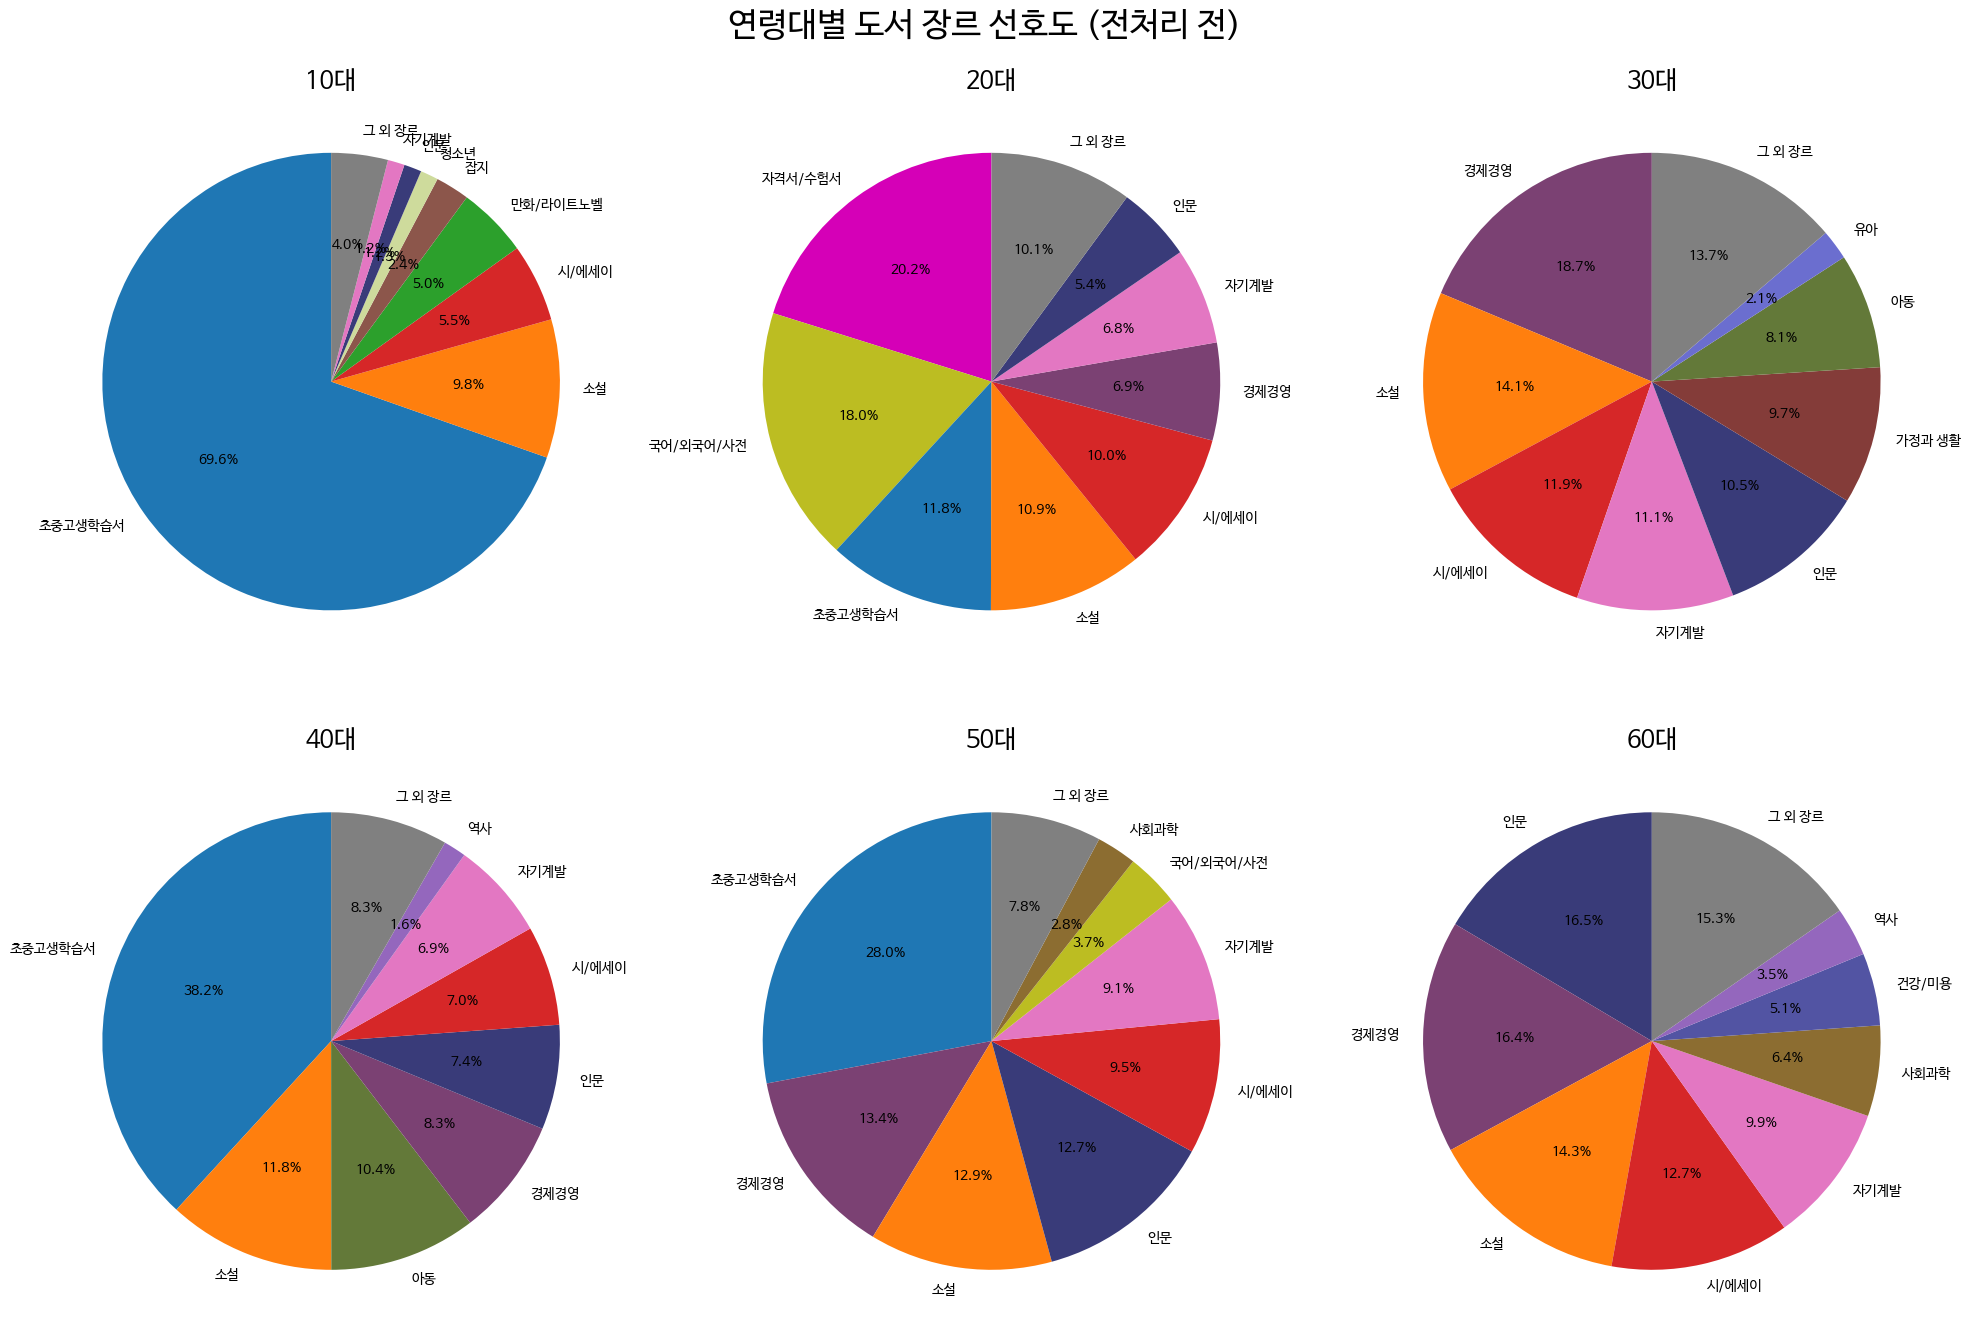

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


age_groups = interpark_df['Age'].unique()

# 진한 색상의 커스텀 리스트
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
    '#D500B7', '#bcbd22', '#17becf', '#393b79', '#637939', '#8c6d31', '#843c39',
    '#7b4173', '#5254a3', '#6b6ecf', '#9c9ede', '#cedb9c', '#e7ba52'
]
# 모든 카테고리 추출 및 색상 맵 생성
all_categories = interpark_df['Category'].unique()
color_map = dict(zip(all_categories, custom_colors[:len(all_categories)]))
color_map['그 외 장르'] = '#808080'  # 그 외 장르는 회색으로 설정

fig, axes = plt.subplots(2, 3, figsize=(20, 14))

for i, age_label in enumerate(age_groups):
    row, col = divmod(i, 3)

    # 해당 연령대의 카테고리 선호도 계산
    preferences = interpark_df[interpark_df['Age'] == age_label]['Category'].value_counts()

    if preferences.empty:
        axes[row, col].set_title(f'{age_label} Preferences (No Data)', size=14)
        continue

    # 상위 8개 카테고리 선택 및 나머지를 '그 외 장르'로 묶기
    top_8 = preferences.nlargest(8)
    others = pd.Series({'그 외 장르': preferences.sum() - top_8.sum()})
    plot_data = pd.concat([top_8, others])

    # 색상 리스트 생성
    colors = [color_map.get(cat, '#808080') for cat in plot_data.index]

    # 파이 차트 그리기
    wedges, texts, autotexts = axes[row, col].pie(plot_data, labels=plot_data.index, autopct='%1.1f%%',
                                                  startangle=90, colors=colors)

    # 레이블 텍스트 크기 조정
    plt.setp(texts, size=10)
    plt.setp(autotexts, size=10, weight="bold")

    axes[row, col].set_title(f'{age_label}', size=18)

plt.suptitle('연령대별 도서 장르 선호도 (전처리 전)', size=24)
plt.tight_layout()
plt.show()

연령대별 카테고리 선호도 (전처리 후)

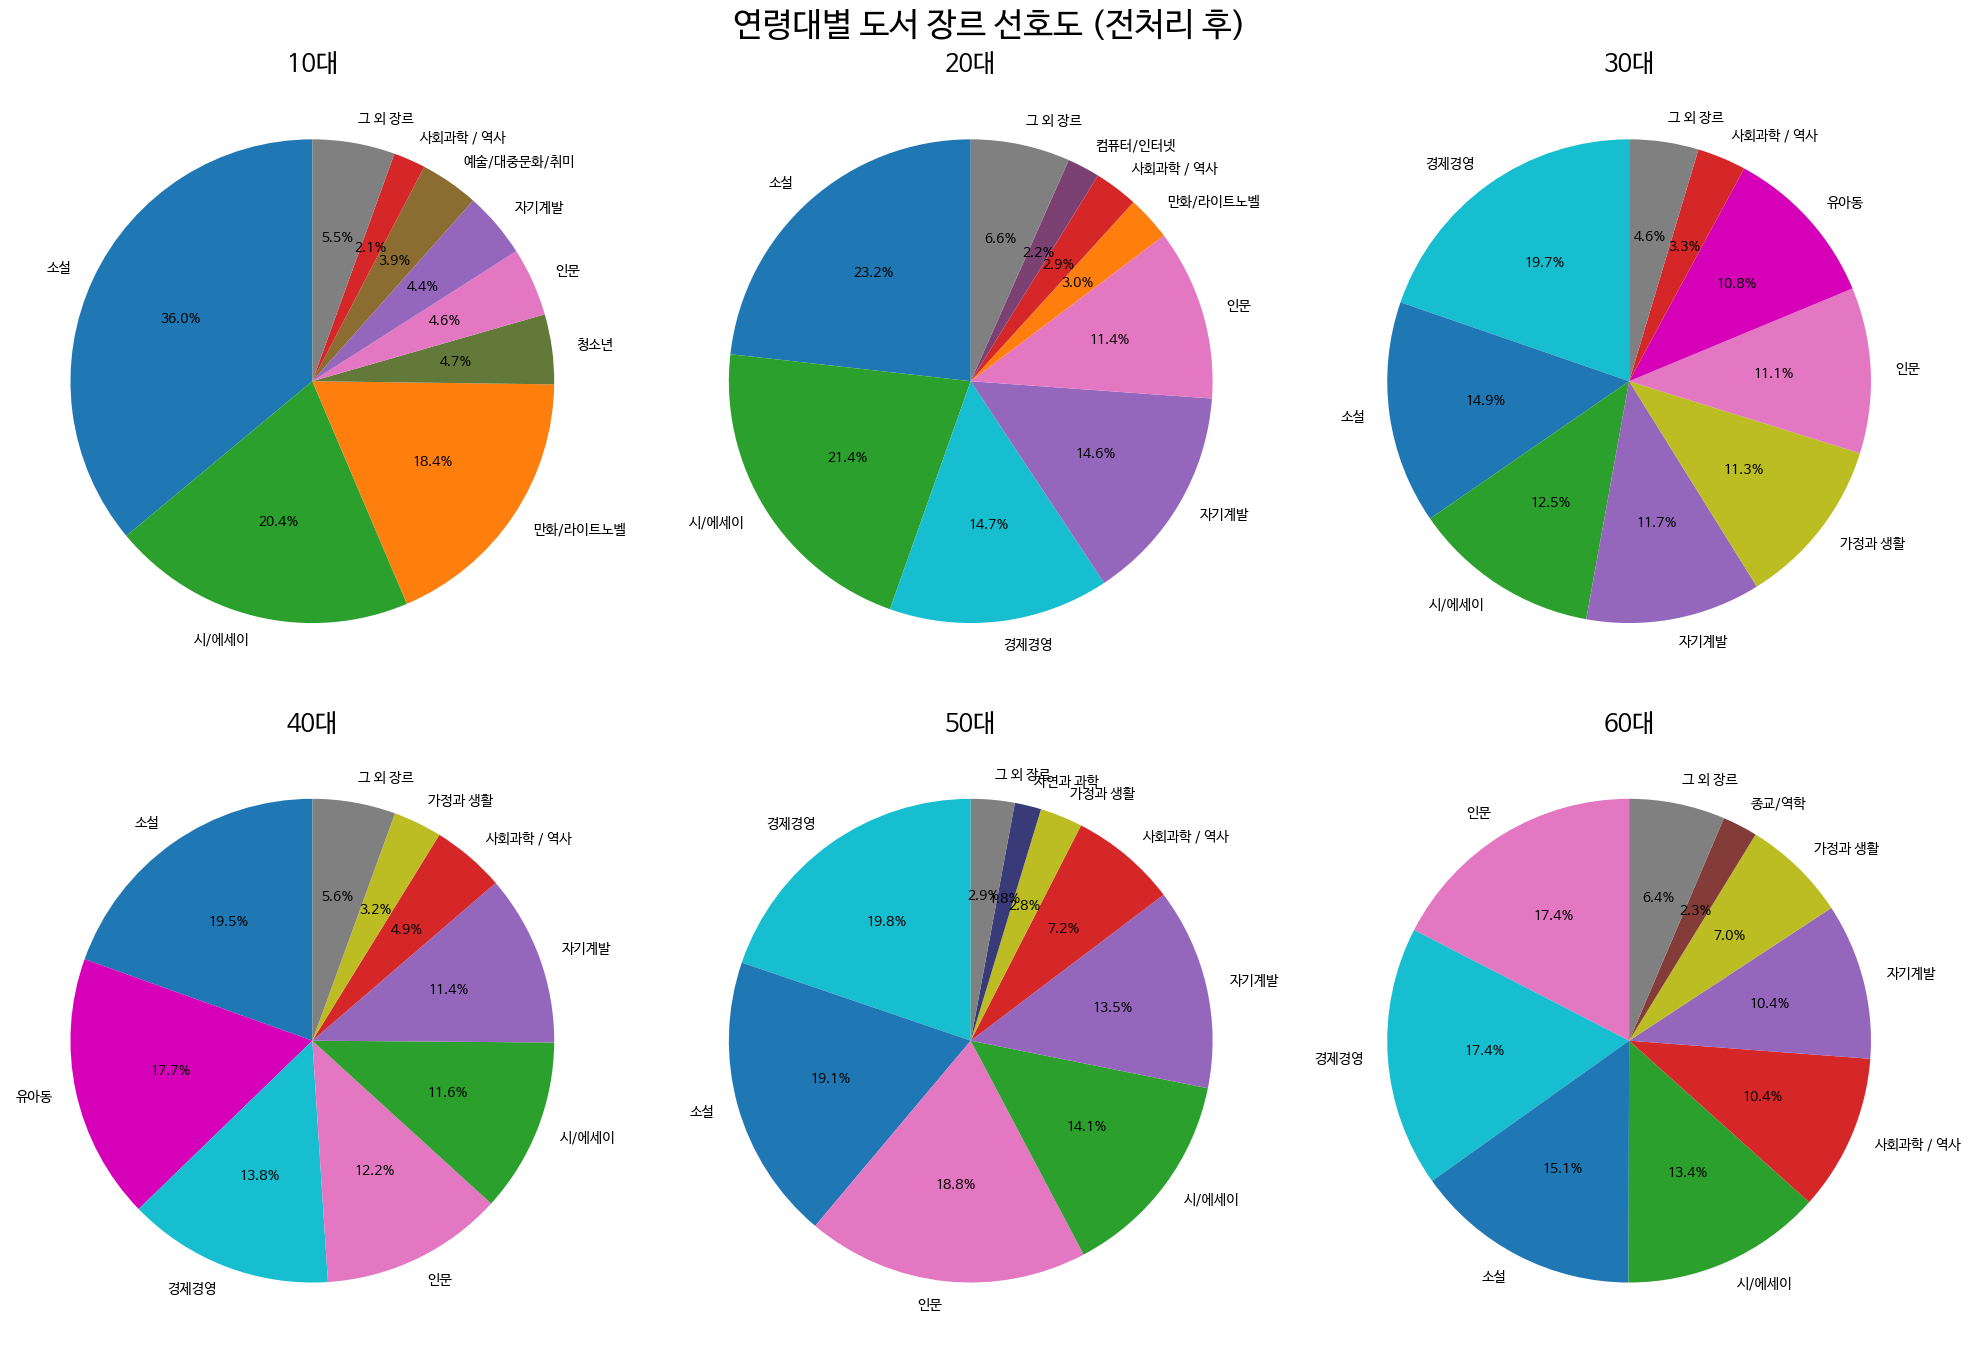

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


age_groups = df['Age'].unique()

# 진한 색상의 커스텀 리스트
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
    '#D500B7', '#bcbd22', '#17becf', '#393b79', '#637939', '#8c6d31', '#843c39',
    '#7b4173', '#5254a3', '#6b6ecf', '#9c9ede', '#cedb9c', '#e7ba52'
]
# 모든 카테고리 추출 및 색상 맵 생성
all_categories = df['Category'].unique()
color_map = dict(zip(all_categories, custom_colors[:len(all_categories)]))
color_map['그 외 장르'] = '#808080'  # 그 외 장르는 회색으로 설정

fig, axes = plt.subplots(2, 3, figsize=(20, 14))

for i, age_label in enumerate(age_groups):
    row, col = divmod(i, 3)

    # 해당 연령대의 카테고리 선호도 계산
    preferences = df[df['Age'] == age_label]['Category'].value_counts()

    if preferences.empty:
        axes[row, col].set_title(f'{age_label} Preferences (No Data)', size=14)
        continue

    # 상위 8개 카테고리 선택 및 나머지를 '그 외 장르'로 묶기
    top_8 = preferences.nlargest(8)
    others = pd.Series({'그 외 장르': preferences.sum() - top_8.sum()})
    plot_data = pd.concat([top_8, others])

    # 색상 리스트 생성
    colors = [color_map.get(cat, '#808080') for cat in plot_data.index]

    # 파이 차트 그리기
    wedges, texts, autotexts = axes[row, col].pie(plot_data, labels=plot_data.index, autopct='%1.1f%%',
                                                  startangle=90, colors=colors)

    # 레이블 텍스트 크기 조정
    plt.setp(texts, size=10)
    plt.setp(autotexts, size=10, weight="bold")

    axes[row, col].set_title(f'{age_label}', size=18)

plt.suptitle('연령대별 도서 장르 선호도 (전처리 후)', size=24)
plt.tight_layout()
plt.show()

# 5. 독서 트렌드 변화 파악

## Ⅰ. 17년도부터 현재까지 독자들의 선호도 변화 ★


 - x: 시간, y: Sales.sum(), elements: Category10

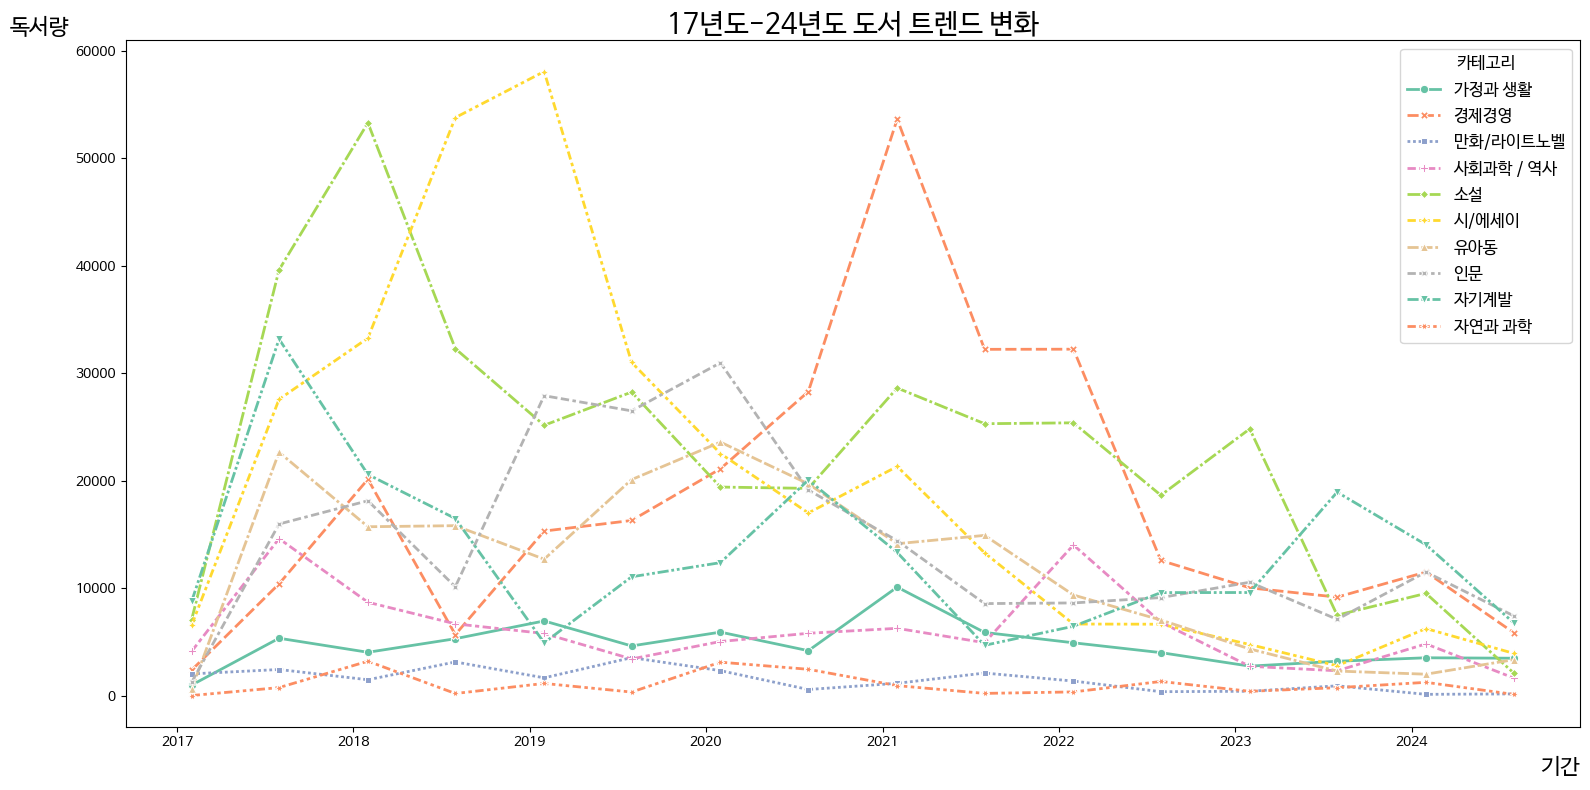

In [ ]:
category_top10 = df['Category'].value_counts().head(10).index

# 상위 10개 카테고리에 해당하는 데이터 필터링
date_sales_category = df[df['Category'].isin(category_top10)].copy()

# Month 칼럼을 활용하여 6개월 단위로 집계
date_sales_category['Date'] = pd.to_datetime(date_sales_category['Date'])
date_sales_category = date_sales_category.set_index('Date').groupby('Category').resample('6M')['Sales'].sum().reset_index()

# 연도별 상위 10개 카테고리별 독서 구매량
plt.figure(figsize=(16, 8))
sns.lineplot(data=date_sales_category, x='Date', y='Sales', hue='Category', style='Category', markers=True, palette='Set2',
             linewidth=2)
plt.title('17년도-24년도 도서 트렌드 변화', fontsize=20)
plt.xlabel('기간', fontsize=16, loc='right')
plt.ylabel('독서량', fontsize=16, rotation=0, loc='top')
plt.legend(title='카테고리', title_fontsize=12, loc='upper right', fontsize=12)
plt.grid(False)

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

#### 도서 트렌드 변화 확인
 - 시간 흐름에 따른 도서 종류의 트렌드 변화 추이를 확인할 수 있습니다.
  - 2019년도부터 2021년도 경제.경영 분야에 대한 도서 구매량이 폭증한 것을 확인할 수 있습니다. 이는 코로나 여파로 폭락했던 경제위기 상황을 타계하고 경기를 부양하기 위한 경제정책의 영향으로 주식에 대한 투자 열풍이 불기 시작하며 사회적인 관심이 경제분야 집중된 영향이 도서 출판 분야에도 영향을 미친 것으로 분석할 수 있습니다.

## Ⅱ. 17년도 카테고리 TOP10 / 24년도 카테고리 TOP10

- 위 그래프를 통해 2017년도부터 현재까지 사람들의 관심분야(카테고리)가 어떻게 바뀌어가는지 확인이 가능했음.
- 아래는 '2017년 카테고리별 선호도'와 '2024년 카테고리별 선호도' 그래프로  
독자들의 **관심분야** 가 17년도에 비해 어떻게 바뀌었는지 확인하고 **가장 인기있는 카테고리 TOP10** 에 한하여 추가 분석.

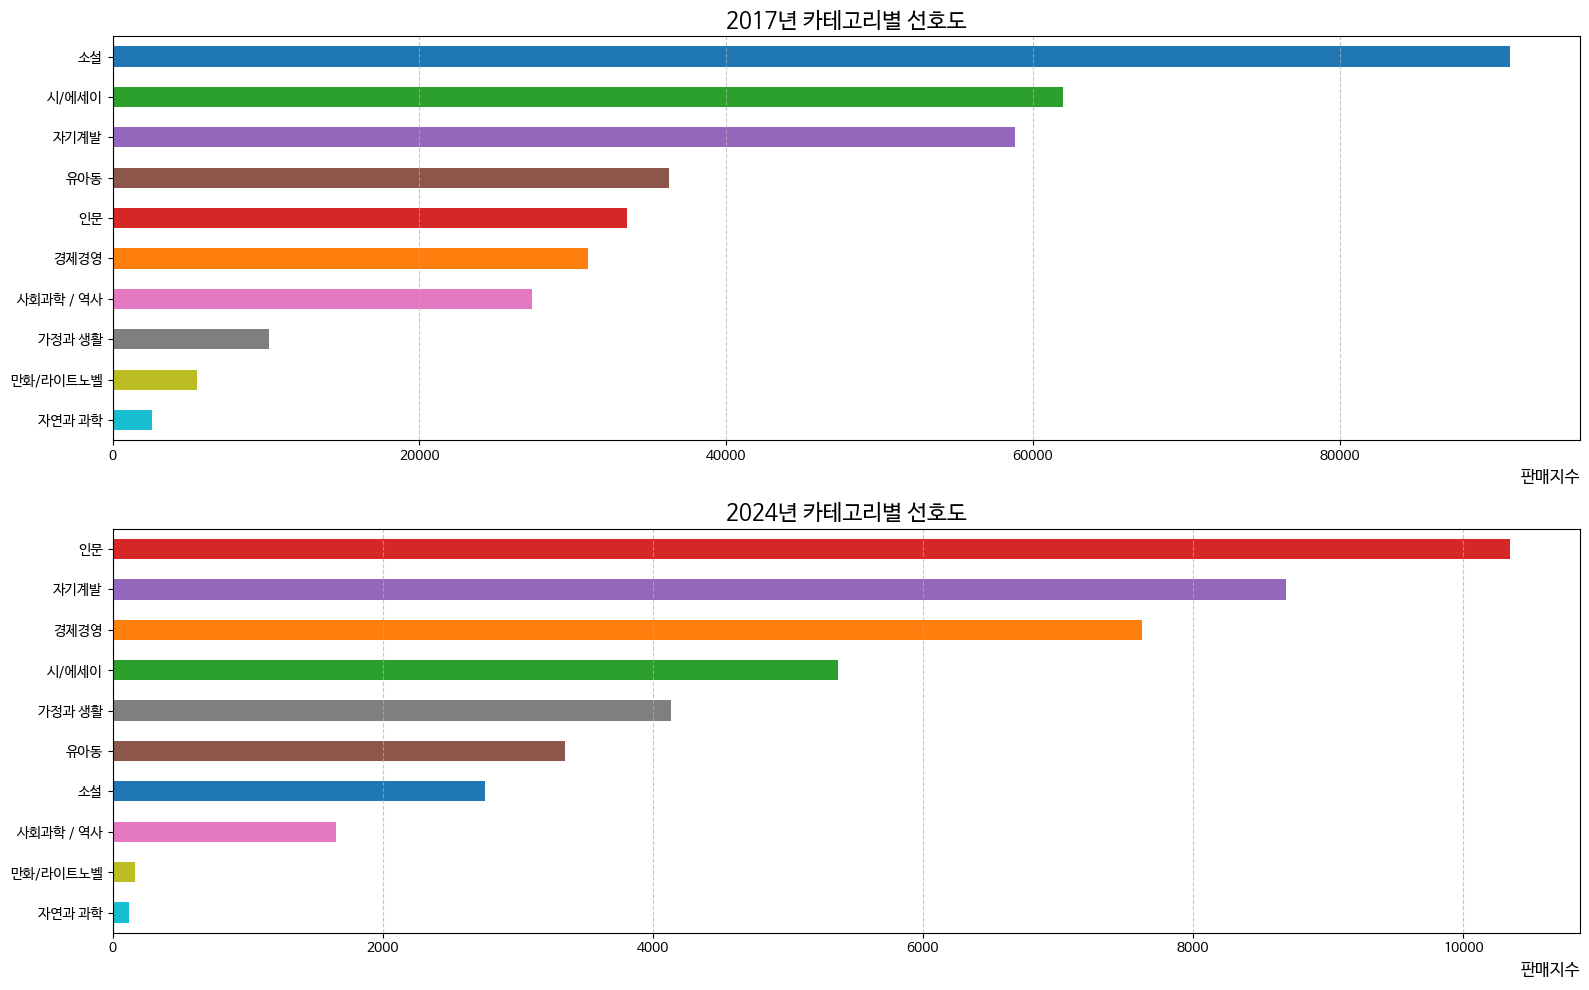

In [ ]:
# 2017년 카테고리별 선호도와 2024년 현재 카테고리별 선호도 2x1 subplot
import pandas as pd
import matplotlib.pyplot as plt

grouped_df = df.groupby(['Year', 'Category'])['Sales'].sum().unstack().fillna(0)
grouped_df = grouped_df[category_top10]

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Sales 크기에 따라 역순으로 정렬
sorted_grouped_df_2017 = grouped_df.loc[2017].sort_values(ascending=True)
sorted_grouped_df_2024 = grouped_df.loc[2024].sort_values(ascending=True)

categories = ['소설', '경제경영', '시/에세이', '인문', '자기계발', '유아동', '사회과학 / 역사', '가정과 생활', '만화/라이트노벨', '자연과 과학']

category_colors = {
    '소설': '#1f77b4',
    '경제경영': '#ff7f0e',
    '시/에세이': '#2ca02c',
    '인문': '#d62728',
    '자기계발': '#9467bd',
    '유아동': '#8c564b',
    '사회과학 / 역사': '#e377c2',
    '가정과 생활': '#7f7f7f',
    '만화/라이트노벨': '#bcbd22',
    '자연과 과학': '#17becf'
}

# 2017년 데이터 시각화
sorted_grouped_df_2017.plot(kind='barh', ax=axes[0], color=[category_colors[category] for category in sorted_grouped_df_2017.index])
axes[0].set_title('2017년 카테고리별 선호도', size=16, weight='bold')
axes[0].set_xlabel('판매지수', loc='right', size=12, weight='bold')
axes[0].set_ylabel('')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# 2024년 데이터 시각화
sorted_grouped_df_2024.plot(kind='barh', ax=axes[1], color=[category_colors[category] for category in sorted_grouped_df_2024.index])
axes[1].set_title('2024년 카테고리별 선호도', size=16, weight='bold')
axes[1].set_xlabel('판매지수',loc='right', size=12, weight='bold')
axes[1].set_ylabel('')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# 레이아웃 조정
plt.tight_layout()
plt.show()


- x축 값을 통해 전반적인 독서량이 현저히 줄은 것을 확인.
- 17년도에는 가장 많은 비중을 차지했던 '소설'분야가 현재는 선호도 7위에 위치한 것을 확인.
- 17년도에는 5위였던 '인문'분야가 24년도에는 1위까지 올라와 현재는 찾는 사람이 가장 많다는 것을 확인 가능.

# 6. Conclusion

**★ 종합적인 지표를 나타내기 위해 다양한 분류로 segmentation**

## Ⅰ. 연령대별

#### 24년도 연령대별 카테고리 TOP 3

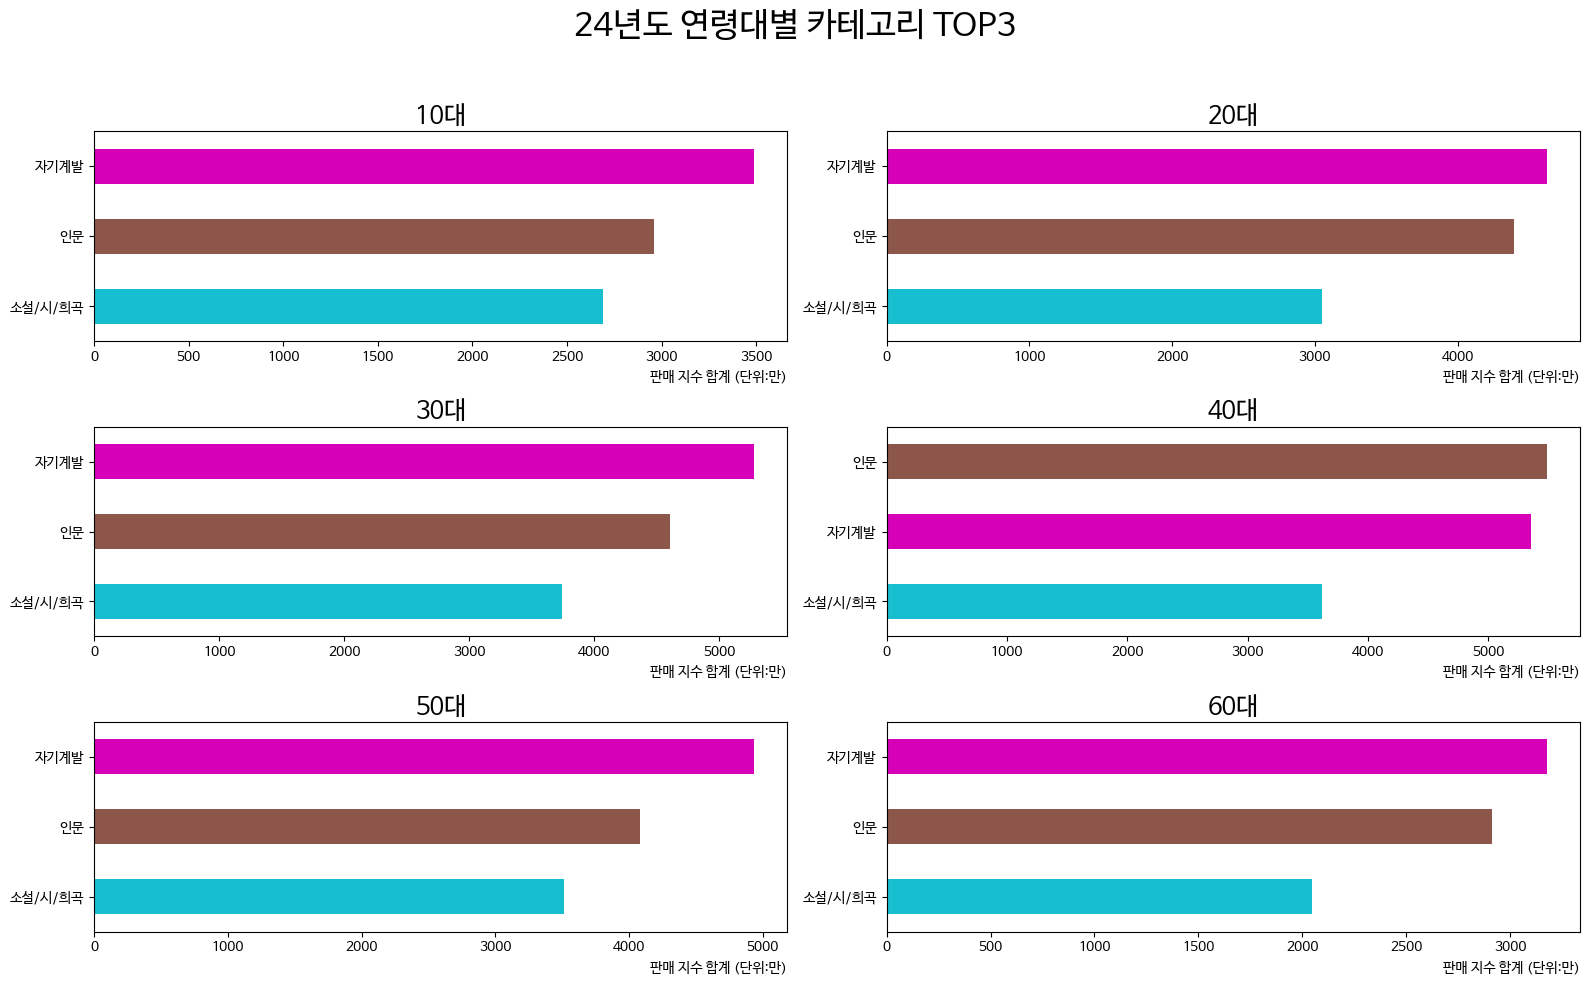

In [ ]:
age_groups = df2['Age'].unique()

# 카테고리별 고유 색상 부여
categories = df2['Category'].unique()
custom_colors = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',
    '#e377c2',
    '#D500B7',
    '#bcbd22',
    '#17becf'
]

category_colors = dict(zip(categories, custom_colors))


fig, axes = plt.subplots(3, 2, figsize=(16, 10))

for i, age_label in enumerate(age_groups):
    row, col = divmod(i, 2)

    preferences = df2[(df2['Age'] == age_label) & (df2['Year'] == 2024)].groupby('Category')['Sales_Index'].sum() / 10000
    preferences = preferences.nlargest(3).sort_values(ascending=True)

    # 색상 리스트 생성
    colors = [category_colors.get(cat, '#808080') for cat in preferences.index]

    preferences.plot(kind='barh', ax=axes[row, col], color=colors)
    axes[row, col].set_title(f'{age_label}대', size=18)
    axes[row, col].set_xlabel('판매 지수 합계 (단위:만)', loc='right', weight='bold')
    axes[row, col].set_ylabel('')

plt.suptitle('24년도 연령대별 카테고리 TOP3', size=24)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 독자 연령대 비율

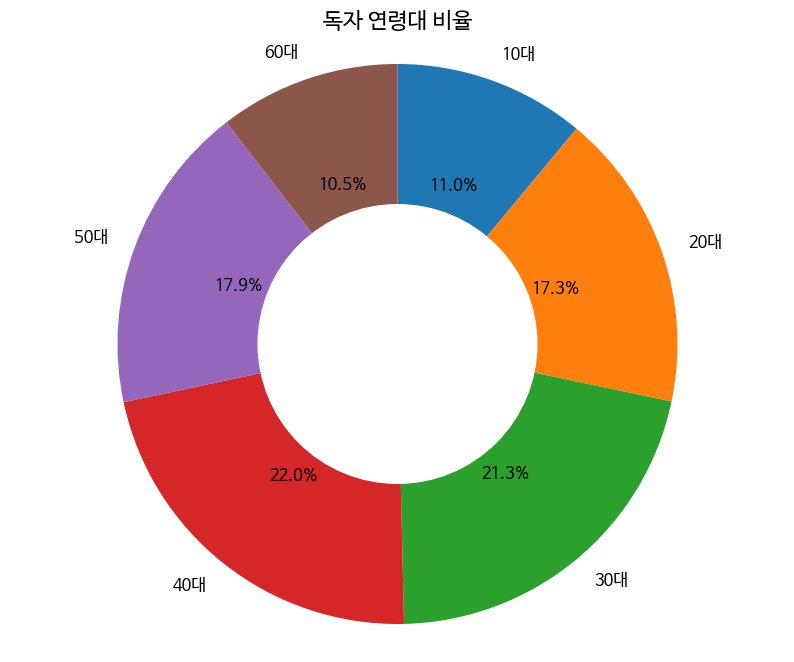

In [ ]:
age_sales = df2.groupby('Age')['Sales_Index'].sum()
# 연령대 순서대로 정렬
age_sales = age_sales.sort_index()
labels = [f'{age}대' for age in age_sales.index]
# 파이 차트 그리기
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(age_sales, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)

# 차트 스타일링
plt.setp(texts, size=12, weight='bold')
plt.setp(autotexts, size=12, weight='bold')

plt.title('독자 연령대 비율', size=16)
plt.axis('equal')  # 원형을 유지하기 위해 가로세로 비율을 동일하게 설정
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

#### 24년도 독자 남녀 비율

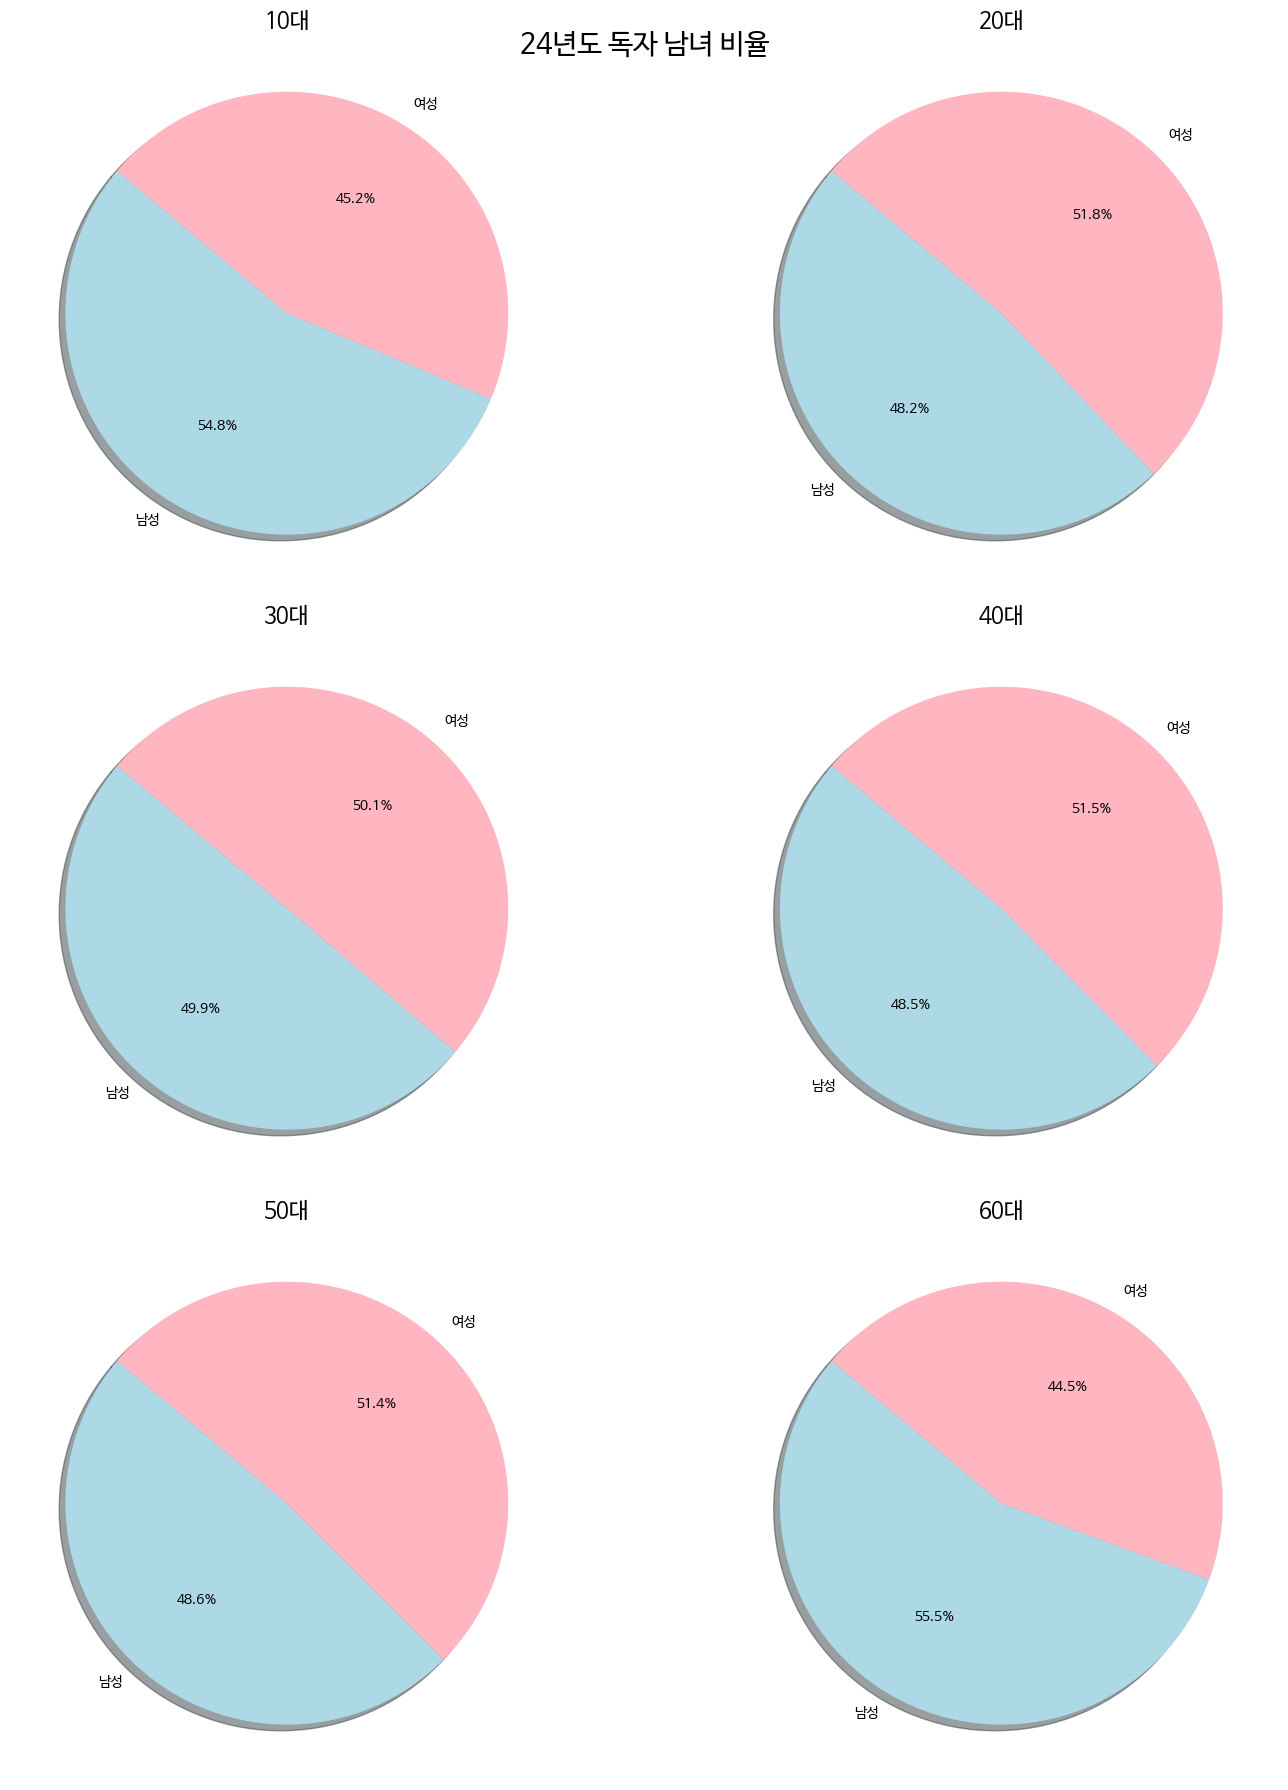

In [ ]:
sales_summary = df2.groupby(['Age', 'Gender'])['Sales_Index'].sum().unstack()

# 결과 시각화
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

colors = ['lightblue', 'lightpink']

for ax, (age, row) in zip(axes.flatten(), sales_summary.iterrows()):
    pie = row.plot(kind='pie', ax=ax, labels=['남성', '여성'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
    ax.set_title(f'{age}대', size=16, weight='bold')
    ax.set_ylabel('')
    ax.set_aspect('equal')

plt.tight_layout()
plt.suptitle('24년도 독자 남녀 비율', fontsize=20, weight='bold')
plt.show()


## Ⅱ. 카테고리별

#### 특정 카테고리의 월별 출판 건수

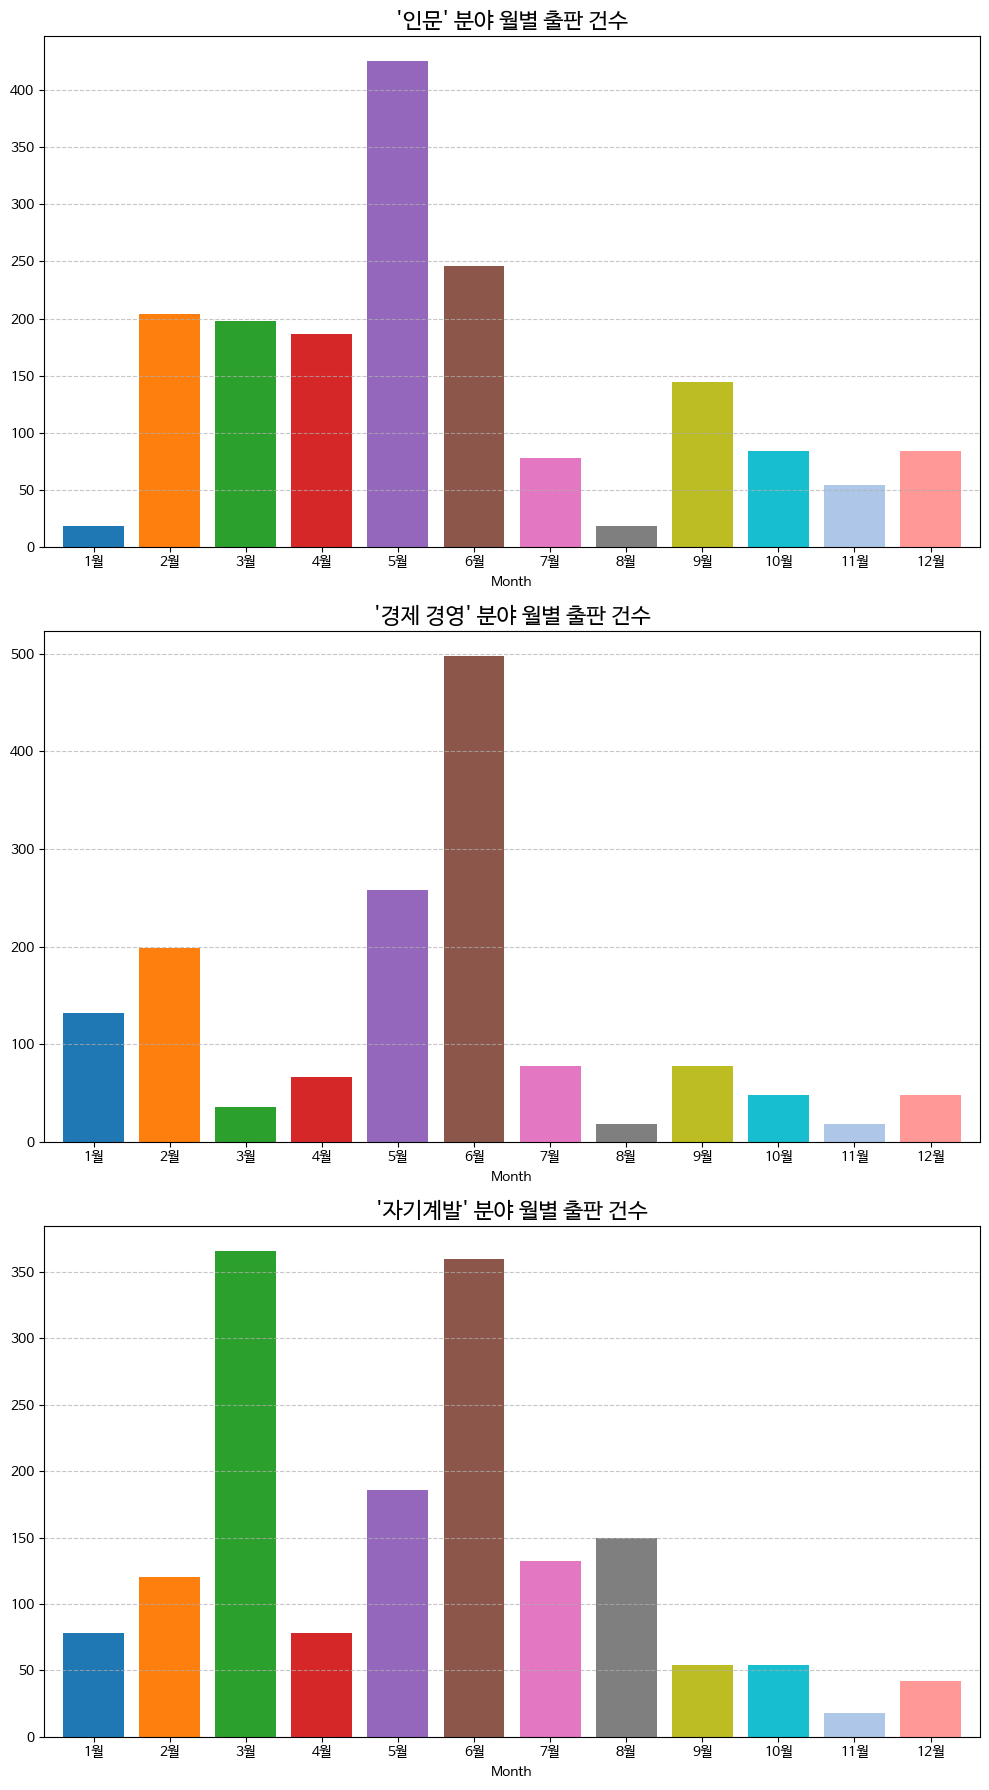

In [ ]:
month_category_counts = df2.groupby(['Publish_Month', 'Category']).size().unstack().fillna(0)

# 선택한 카테고리 리스트
selected_categories = ['인문', '경제 경영', '자기계발']

# 각 카테고리별로 월별 카운트 데이터 추출
category_data = {}
for category in selected_categories:
    if category in month_category_counts.columns:
        category_data[category] = month_category_counts[category]


custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ff9896']


# 막대 그래프로 시각화
fig, axes = plt.subplots(len(selected_categories), 1, figsize=(10, 18))

for i, category in enumerate(selected_categories):
    ax = axes[i]
    if category in category_data:
        month_counts = category_data[category]
        month_counts.plot(kind='bar', ax=ax, color=custom_colors, width=0.8)
        ax.set_title(f"'{category}' 분야 월별 출판 건수", size=16)
        ax.set_xlabel('Month')
        ax.set_ylabel('')
        ax.set_xticklabels([f'{m}월' for m in month_counts.index], rotation=0)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### 특정 카테고리 연령대별 선호도 및 남/여 비율

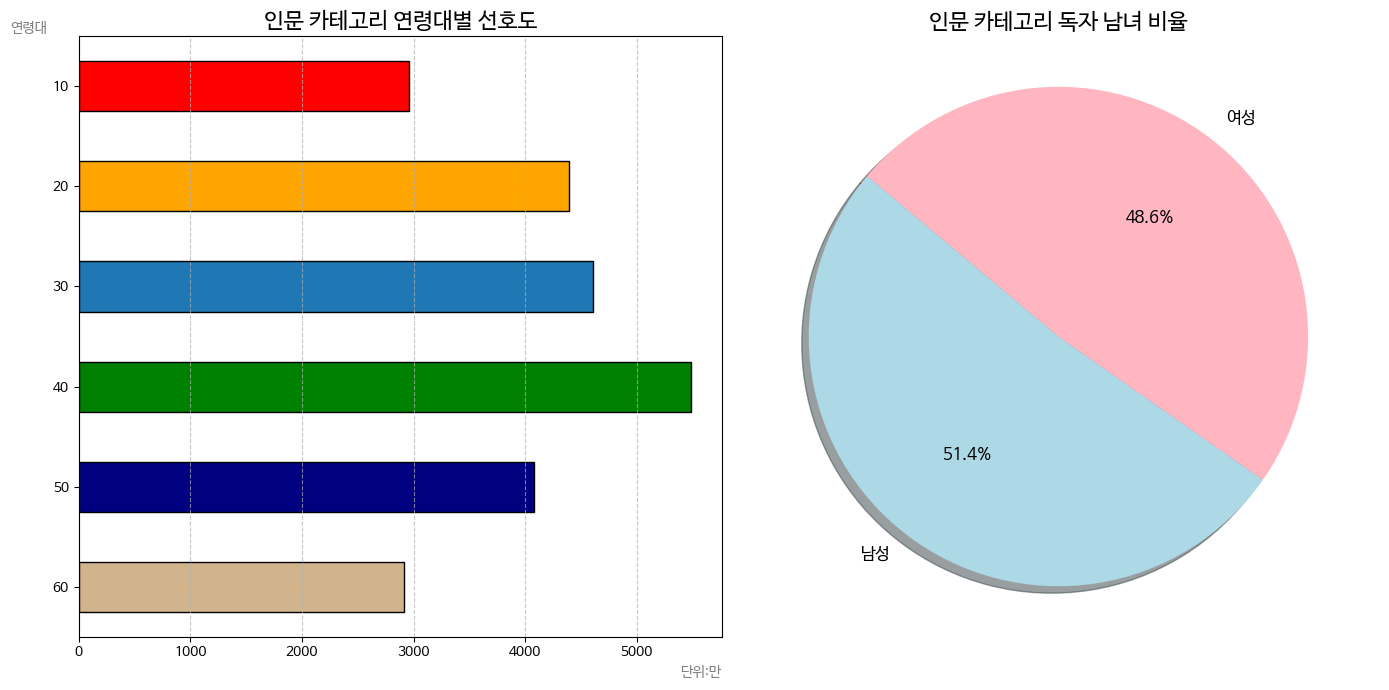

In [ ]:
# 인문 카테고리 데이터 필터링
humanities_data = df2[df2['Category'] == '인문']
custom_colors = ['#FF0000', '#FFA500', '#1f77b4', '#008000', '#000080', '#D2B48C']

# 인문 카테고리 연령대별 선호도 막대 그래프
age_sales = humanities_data.groupby('Age')['Sales_Index'].sum() / 10000  # 판매 지수를 '만' 단위로 변환

plt.figure(figsize=(14, 7))

# subplot 1: 인문 카테고리 연령대별 선호도 막대 그래프
plt.subplot(1, 2, 1)
age_sales.plot(kind='barh', color=custom_colors, edgecolor='black')
plt.title('인문 카테고리 연령대별 선호도', size=16)
plt.xlabel('단위:만', loc='right', color='gray')
plt.ylabel('연령대', rotation=0, loc='top', color='gray')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# subplot 2: 인문 카테고리 독자 남녀 비율 파이 차트
plt.subplot(1, 2, 2)
gender_ratio = humanities_data['Gender'].value_counts()
wedges, texts, autotexts = plt.pie(gender_ratio, labels=['남성', '여성'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'], shadow=True)
plt.setp(texts, size=12, weight='bold')
plt.setp(autotexts, size=12, weight='bold')
plt.title('인문 카테고리 독자 남녀 비율', size=16)
plt.axis('equal')

plt.tight_layout()
plt.show()


## Ⅲ. 성별

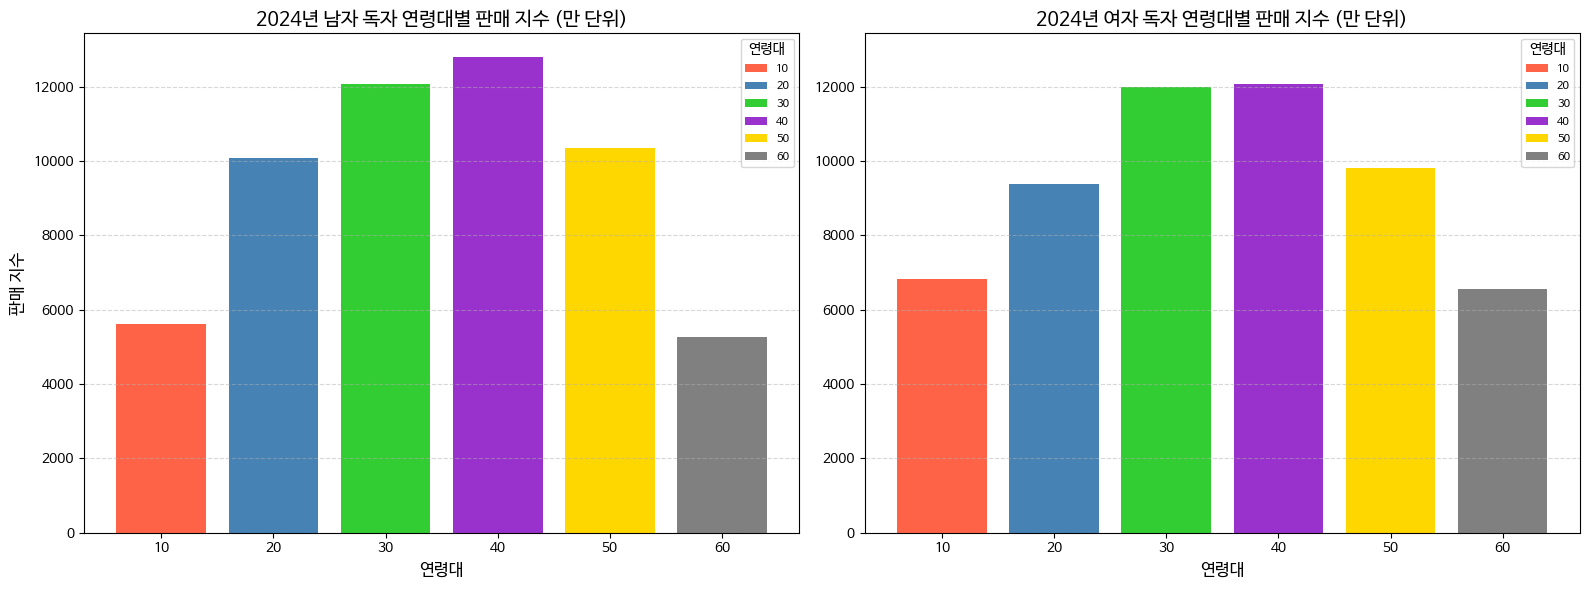

In [ ]:
male_sales_by_age = df2[df2['Gender'] == 1].groupby('Age')['Sales_Index'].sum() / 10000  # 판매 지수를 '만' 단위로 변환
female_sales_by_age = df2[df2['Gender'] == 0].groupby('Age')['Sales_Index'].sum() / 10000

# 연령대에 따른 색상 맵
custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#9932CC', '#FFD700', '#808080']

plt.figure(figsize=(16, 6))

# 남자 독자 연령대별 판매 지수 막대 그래프
plt.subplot(1, 2, 1)
bars = plt.bar(male_sales_by_age.index.astype(str), male_sales_by_age, color=custom_colors)
plt.title('2024년 남자 독자 연령대별 판매 지수 (만 단위)', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('판매 지수', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bars, male_sales_by_age.index.astype(str), title='연령대', title_fontsize=10, loc='upper right', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 여자 독자 연령대별 판매 지수 막대 그래프
plt.subplot(1, 2, 2, sharey=plt.gca())    # y축 공유
bars = plt.bar(female_sales_by_age.index.astype(str), female_sales_by_age, color=custom_colors)
plt.title('2024년 여자 독자 연령대별 판매 지수 (만 단위)', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bars, female_sales_by_age.index.astype(str), title='연령대', title_fontsize=10, loc='upper right', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

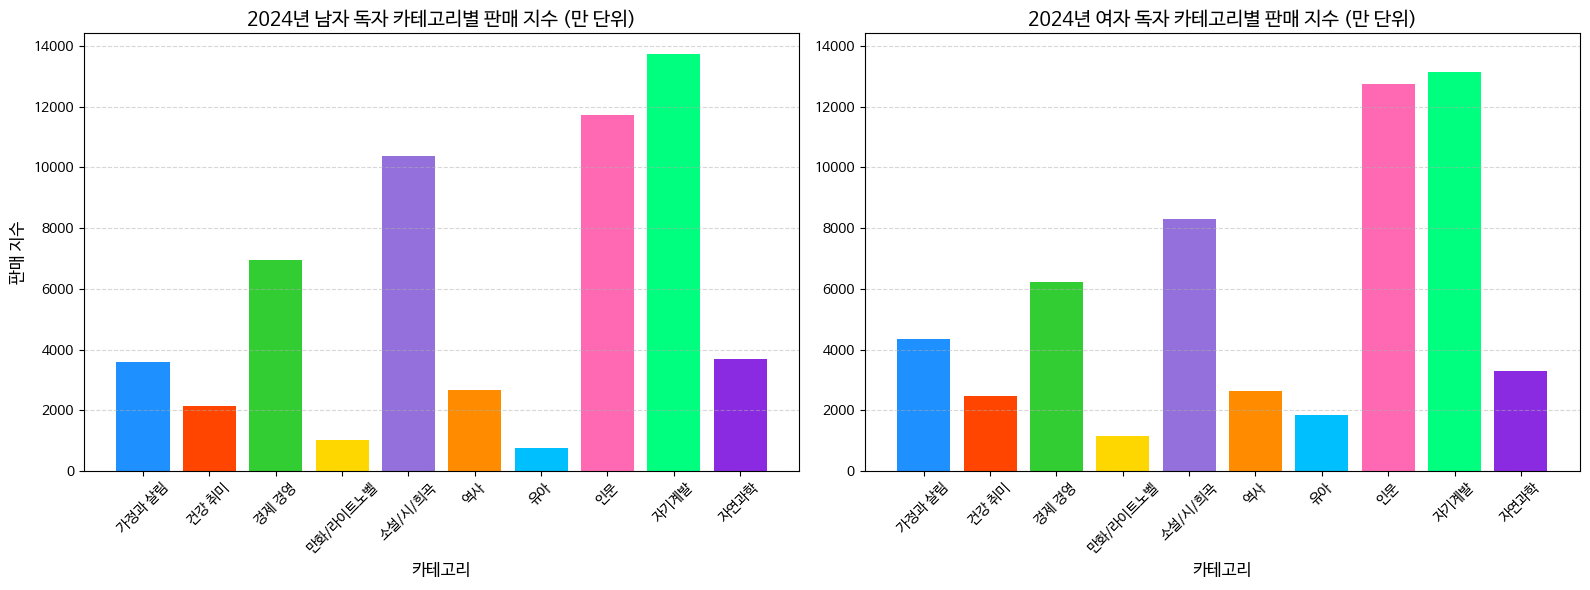

In [ ]:
import matplotlib.pyplot as plt

# 남자 독자 카테고리별 판매 지수 계산
male_sales_by_category = df2[df2['Gender'] == 0].groupby('Category')['Sales_Index'].sum() / 10000  # 판매 지수를 '만' 단위로 변환
# 여자 독자 카테고리별 판매 지수 계산
female_sales_by_category = df2[df2['Gender'] == 1].groupby('Category')['Sales_Index'].sum() / 10000  # 판매 지수를 '만' 단위로 변환

# 연령대에 따른 색상 맵
custom_colors = ['#1E90FF', '#FF4500', '#32CD32', '#FFD700', '#9370DB', '#FF8C00', '#00BFFF', '#FF69B4', '#00FF7F', '#8A2BE2']

plt.figure(figsize=(16, 6))

# 남자 독자 카테고리별 판매 지수 막대 그래프
plt.subplot(1, 2, 1)
bars = plt.bar(male_sales_by_category.index.astype(str), male_sales_by_category, color=custom_colors)
plt.title('2024년 남자 독자 카테고리별 판매 지수 (만 단위)', fontsize=14)
plt.xlabel('카테고리', fontsize=12)
plt.ylabel('판매 지수', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 여자 독자 카테고리별 판매 지수 막대 그래프
plt.subplot(1, 2, 2, sharey=plt.gca())
bars = plt.bar(female_sales_by_category.index.astype(str), female_sales_by_category, color=custom_colors)
plt.title('2024년 여자 독자 카테고리별 판매 지수 (만 단위)', fontsize=14)
plt.xlabel('카테고리', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


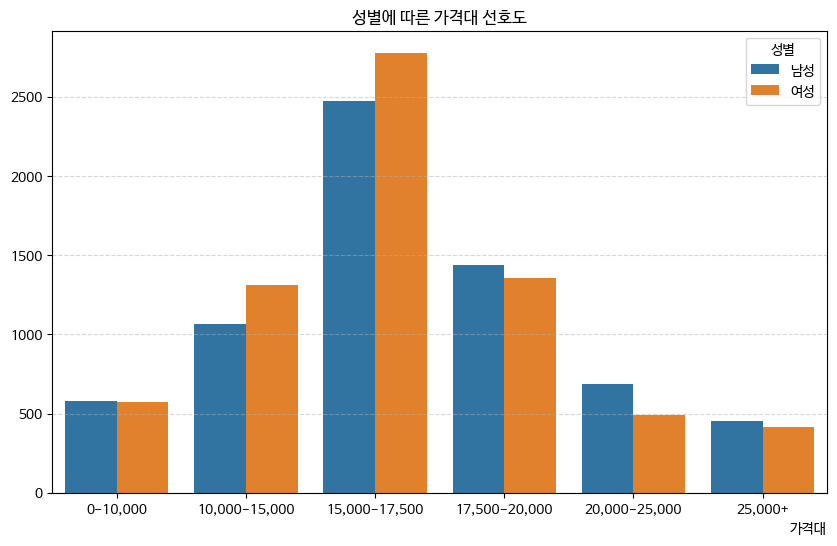

In [ ]:
df2_gender = df2.copy()
df2_gender['Gender'] = df2_gender['Gender'].map({0: '남성', 1: '여성'})
# 성별에 따른 책구매가격 선호도
price_range_by_gender = df2_gender.groupby(['Gender', 'Price_cat']).size().reset_index(name='Count')

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=price_range_by_gender, x='Price_cat', y='Count', hue='Gender')
plt.title('성별에 따른 가격대 선호도')
plt.xlabel('가격대', loc='right')
plt.ylabel('')
plt.legend(title='성별')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<ipython-input-33-438967e6ade5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2_gender[df2_gender['Gender'] == '남성'], x='Page_cat', palette='pastel')
<ipython-input-33-438967e6ade5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2_gender[df2_gender['Gender'] == '여성'], x='Page_cat', palette='pastel')


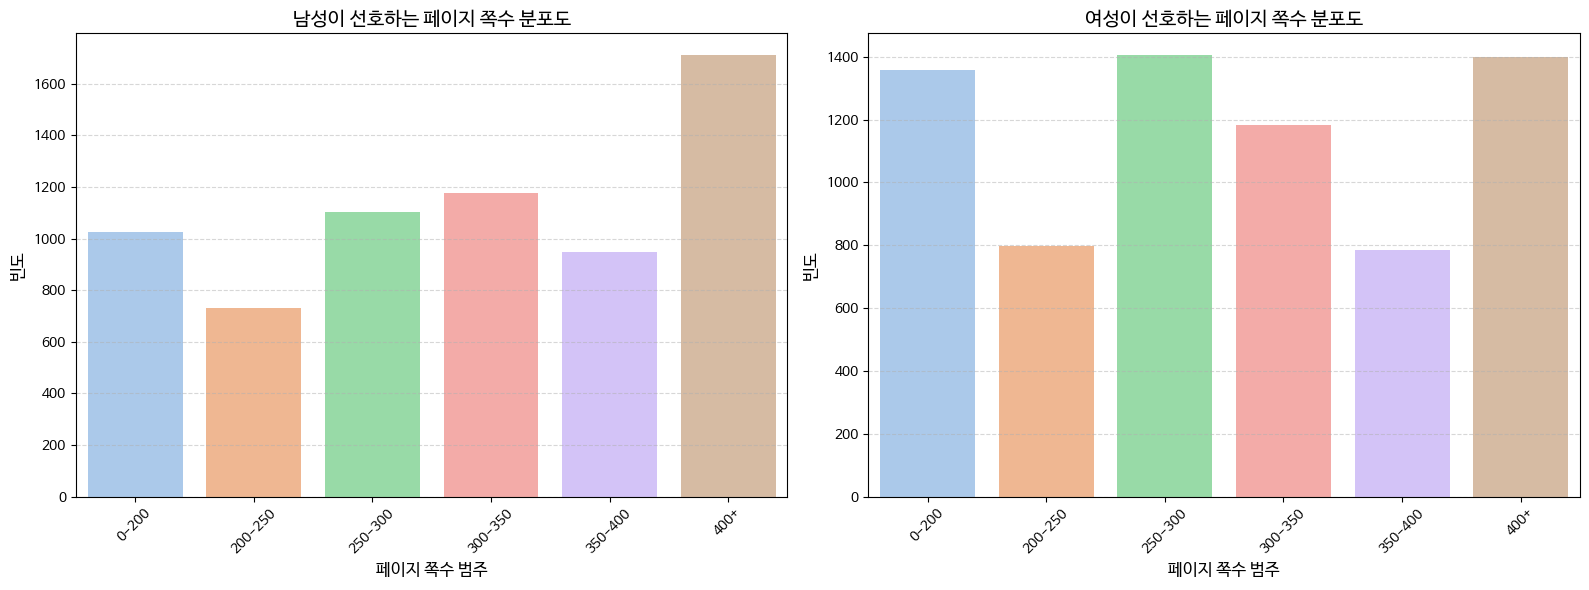

In [ ]:
# 성별에 따른 페이지 쪽수 분포도 데이터 준비
plt.figure(figsize=(16, 6))

# 남성 페이지 쪽수 분포도
plt.subplot(1, 2, 1)
sns.countplot(data=df2_gender[df2_gender['Gender'] == '남성'], x='Page_cat', palette='pastel')
plt.title('남성이 선호하는 페이지 쪽수 분포도', fontsize=14)
plt.xlabel('페이지 쪽수 범주', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 여성 페이지 쪽수 분포도
plt.subplot(1, 2, 2)
sns.countplot(data=df2_gender[df2_gender['Gender'] == '여성'], x='Page_cat', palette='pastel')
plt.title('여성이 선호하는 페이지 쪽수 분포도', fontsize=14)
plt.xlabel('페이지 쪽수 범주', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## ProtoType

In [2]:
def target_type_ages(df, age):
    ###     유효하지 않은 데이터프레임 예외처리

    if df.empty:
        print("데이터프레임이 비어 있습니다. 유효한 데이터프레임을 입력하세요.")
        return

    df_age = df[df['Age'] == age]

    preferences = df_age.groupby('Category')['Sales_Index'].sum().nlargest(5).sort_values(ascending=True)
    ages_ratio = df.groupby('Age')['Sales_Index'].sum().loc[[10, 20, 30, 40, 50, 60]].fillna(0)
    gender_ratio = df.groupby(['Age', 'Gender'])['Sales_Index'].sum().unstack()
    pg_counts_by_ages = df_age['Page_cat'].value_counts().sort_index()
    price_counts_by_ages = df_age['Price_cat'].value_counts().sort_index()

    ###     Colors Setting

    # 특정 연령대 색상 설정
    colors = ['lightgray' if x != age else 'gold' for x in ages_ratio.index]
    if age in ages_ratio.index:
        colors[ages_ratio.index.get_loc(age)] = 'gold'
    age_labels = [f'{x}대' for x in ages_ratio.index]

    # 카테고리별 고유 색상 부여
    categories = df2['Category'].unique()
    custom_colors = [
        '#1f77b4',
        '#ff7f0e',
        '#2ca02c',
        '#d62728',
        '#9467bd',
        '#8c564b',
        '#e377c2',
        '#D500B7',
        '#bcbd22',
        '#17becf'
    ]

    category_colors = dict(zip(categories, custom_colors))


    # 시각화 부분

    fig = plt.figure(figsize=(14, 16))
    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

    # 첫 번째 행의 서브 플롯 (1행 전체를 차지)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.barh(preferences.index, preferences.values, color=[category_colors.get(cat, 'gray') for cat in preferences.index])
    ax1.set_yticks(range(len(preferences.index)))  # y축에 인덱스 사용
    ax1.set_yticklabels(preferences.index)
    ax1.set_title(f'24년도 {age}대가 선호하는 카테고리 TOP 5', fontsize=18)

    # 두 번째 행의 첫 번째 서브 플롯 (파이차트)
    ax2 = fig.add_subplot(gs[1, 0])
    wedges, texts, autotexts = ax2.pie(
        ages_ratio, colors=colors, autopct='%1.1f%%', startangle=90,
        labels=age_labels, wedgeprops={'edgecolor': 'black'}, counterclock=False
    )
    for i, wedge in enumerate(wedges):
        if ages_ratio.index[i] == age:
            wedge.set_edgecolor('black')
            wedge.set_linewidth(2)
        else:
            texts[i].set_color('gray')
            autotexts[i].set_color('gray')
    ax2.set_ylabel('')
    ax2.set_title(f'전체 독자 중 {age}대 비율', fontsize=15)

    # 두 번째 행의 두 번째 서브 플롯 (파이차트)
    ax3 = fig.add_subplot(gs[1, 1])
    gender_ratio.loc[age].plot.pie(ax=ax3, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
    ax3.set_ylabel('')
    ax3.set_title(f'{age}대 독자 남녀 비율', fontsize=15)

    # 세 번째 행의 첫 번째 서브 플롯
    ax4 = fig.add_subplot(gs[2, 0])
    pg_counts_by_ages.plot.bar(ax=ax4, color='b')
    ax4.set_title(f'{age}대 독자들이 선호하는 책 길이', fontsize=15)
    ax4.set_xticklabels(pg_counts_by_ages.index, rotation=0)

    # 세 번째 행의 두 번째 서브 플롯
    ax5 = fig.add_subplot(gs[2, 1])
    price_counts_by_ages.plot.bar(ax=ax5, color='m')
    ax5.set_title(f'{age}대 독자들이 선호하는 책의 가격', fontsize=15)
    ax5.set_xticklabels(price_counts_by_ages.index, rotation=0)

    # 레이아웃 조정
    plt.tight_layout()
    plt.show()


In [ ]:
print('*'*70)
print(f"{'*'*5:<25}{'Reader Mind':^20}{'*'*5:>25}")
print('*'*70)
while True:
    try:
        target_type = input('1. 연령대 별       2. 카테고리 별       3. 성별                0. 종료\n')

        if target_type == '1':
            age = int(input('타겟층 연령대를 입력하세요 : \n'))
            print('\n        Targeting Customer ...   \n')
            if age in df2['Age'].unique():
                target_type_ages(df2, age)
                break
            else:
                print('※ 10, 20, 30, 40, 50, 60 의 형태로 입력해주세요. ※')
                continue

        elif target_type == '2':
            print('======================출판을 희망하는 분야 선택=======================')
            print('( 가정과 살림, 자연과학, 만화/라이트노벨, 역사, 건강 취미, 인문, 경제 경영, 자기계발, 유아, 소설/시/희곡 )')
            print('===========================================\n')
            category = input('카테고리를 입력하세요 : ')
            if category in df2['Category'].unique():
                # target_type_category(category)
                print('카테고리별 시각화 준비중 ...')
                break
            else:
                print('지정된 카테고리 내에서 선택해주세요')
                continue

        elif target_type == '3':
            gender = input('타겟 성별을 입력하세요 : ')
            if gender in df2['Gender'].unique():
                # target_type_gender(gender)
                print('성별별 시각화 준비중 ...')
                break
            else:
                print('남자 : 0     여자 : 1')
                continue

        elif target_type == '0':
            print(' 종료합니다. ')
            break

        else:
            print('       ※ 양식에 맞게 입력해주세요. ※\n')
            continue

    except ValueError:
        print('         ※ 양식에 맞게 입력해주세요. ※\n')
        continue


**********************************************************************
*****                        Reader Mind                         *****
**********************************************************************
1. 연령대 별       2. 카테고리 별       3. 성별                0. 종료
0
 종료합니다. 
